In [1]:
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def triangulations(n):
    if n < 3:
        return []

    if n == 3:
        return [{(1, 2), (2, 3), (1, 3)}]

    prev = triangulations(n - 1)

    result = []

    for triang in prev:
        neighbors = [j for j in range(1, n - 1) if (min(j, n - 1), max(j, n - 1)) in triang]

        base_triang = triang.copy()
        base_triang.add((1, n))
        base_triang.add((n - 1, n))
        result.append(base_triang)

        for k in range(1, len(neighbors)):
            new_triang = triang.copy()
            new_triang.add((1, n))
            new_triang.add((n - 1, n))

            for (i, j) in zip(neighbors[0:k], neighbors[1:k + 1]):
                new_triang.discard((min(i, n - 1), max(i, n - 1)))
                new_triang.add((min(j, n), max(j, n)))

            result.append(new_triang)

    return result


In [3]:
def GenerateTriangulations(n) :
    pre_triangs = triangulations(n)
    triang = [
    [(i, j) for (i, j) in sublist if j != i + 1 and not (i == 1 and j == n)]
    for sublist in pre_triangs]
    return triang

def DisjointnessMatrix(n):
    triang = GenerateTriangulations(n)
    N = len(triang)
    M = [[0] * N for _ in range(N)]

    for i in range(N):
        Ti = set(tuple(pair) for pair in triang[i])  # Convert list of pairs to a set of tuples
        for j in range(N):
            Tj = set(tuple(pair) for pair in triang[j])
            if Ti.isdisjoint(Tj):
                M[i][j] = 1
    return M


In [4]:
def degree_list(A) :
    degree = []
    for i in range(len(A)) :
        degree.append(np.sum(A[i]))
    return degree
def edges(A) :
    edges = 0
    degree_sum = 0
    for i in range(len(M)) :
        degree_sum += np.sum(A[i])
    edges = (1/2)*degree_sum
    return edges
def NumberOfPositiveEvals(A):
    evals, evecs = np.linalg.eig(A)
    counter = 0
    for i in range(len(evals)) :
        if evals[i] > 0 :
            counter+=1
    return counter
def NumberOfNegativeEvals(A):
    evals, evecs = np.linalg.eig(A)
    counter = 0
    for i in range(len(evals)) :
        if evals[i] < 0 :
            counter+=1
    return counter
def NumberOfZeroEvals(A):
    evals, evecs = np.linalg.eig(A)
    counter = 0
    for i in range(len(evals)) :
        if evals[i] == 0 :
            counter+=1
    return counter
def EigenvalueIndependenceBound(A):
    p0 = NumberOfZeroEvals(A)
    pplus = NumberOfPositiveEvals(A)
    pneg = NumberOfNegativeEvals(A)
    return p0 + min(pplus, pneg)

from collections import defaultdict

def vertex_in_clique_of_size_3(adj_matrix):
    n = len(adj_matrix)
    adj = np.array(adj_matrix)
    result = [False] * n

    # Check all triples (i, j, k)
    for i in range(n):
        for j in range(i+1, n):
            if adj[i][j]:  # i and j are connected
                for k in range(j+1, n):
                    if adj[i][k] and adj[j][k]:  # i,j,k form a triangle
                        result[i] = True
                        result[j] = True
                        result[k] = True
    return result

def visualize_graph(A, n):
    G = nx.Graph()

    # Add all nodes
    G.add_nodes_from(range(1, n + 1))

    # Add always-included edges (i, i+1) and (1, n)
    for i in range(1, n):
        G.add_edge(i, i + 1)
    G.add_edge(1, n)

    # Add custom edges from A
    for u, v in A:
        G.add_edge(u, v)

    # Draw the graph
    pos = nx.circular_layout(G)  # arrange nodes in a circle
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

    # Highlight the always-included edges in red
    cycle_edges = [(i, i+1) for i in range(1, n)] + [(1, n)]
    nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color='red', width=2)

    plt.title("Graph with always-included edges (i, i+1) and (1, n)")
    plt.show()

import matplotlib.pyplot as plt
import networkx as nx

def visualize_graph_list(graph_list, n):
    num_graphs = len(graph_list)
    cols = min(3, num_graphs)  # up to 3 plots per row
    rows = (num_graphs + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    axes = axes.flatten() if num_graphs > 1 else [axes]

    for idx, A in enumerate(graph_list):
        G = nx.Graph()
        G.add_nodes_from(range(1, n + 1))

        # Add always-included cycle edges
        cycle_edges = [(i, i + 1) for i in range(1, n)] + [(1, n)]
        G.add_edges_from(cycle_edges)

        # Add custom edges from A
        G.add_edges_from(A)

        pos = nx.circular_layout(G)

        # Draw all edges
        nx.draw(G, pos, ax=axes[idx], with_labels=True, node_color='lightblue', edge_color='gray',
                node_size=500, font_size=10)

        # Highlight the fixed cycle edges in red
        nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color='red', width=2, ax=axes[idx])

        axes[idx].set_title(f"Graph {idx + 1}")

    # Hide any unused subplots
    for ax in axes[num_graphs:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [5]:
M = DisjointnessMatrix(8)
N = len(M)
degrees = degree_list(M)

### Compute the max degree of KG(T_n)
max_deg = np.max(degrees)
### Compute the min degree of KG(T_n)
min_deg = np.min(degrees)
### Compute the degree matrix D of KG(T_n)
degree_matrix = np.diag(degrees)
### Compute the Laplacian of KG(T_n)
laplacian = degree_matrix - M

### Computing the eigenvalues of the Laplacian of KG(T_n)
evals, evec = np.linalg.eig(laplacian)
### Compute the maximum eigenvalue of the Laplacian of KG(T_n)
max_eval = np.max(evals)

### Compute the adjacency matrix for the subgraph G' of KG(T_n) which deletes all vertices of max degree in KG(T_n)
M = np.array(M)
def prune_matrix(M, m):
    M = M.copy()  # Don't modify original

    while True:
        row_sums = M.sum(axis=1)
        col_sums = M.sum(axis=0)

        rows_to_keep = row_sums != m
        cols_to_keep = col_sums != m

        # If no more rows/cols to remove, break
        if rows_to_keep.all() and cols_to_keep.all():
            break

        # Prune rows and columns
        M = M[rows_to_keep][:, cols_to_keep]

        # Edge case: empty matrix
        if M.size == 0:
            break

    return M
sparse = prune_matrix(M, max_deg)

### Compute the degrees for G'
sparse_degrees = degree_list(sparse)
### Compute the max degree for G'
sparse_max_degree = np.max(sparse_degrees)

### Independence upper bound for G'
alpha_prime = EigenvalueIndependenceBound(sparse)

print(degrees)
### Minimum degree
print('Minimum degree in KG(T_n)', np.min(degrees))
### Number of vertices sparse graph
print('Nmuber of vertices in sparse graph', len(sparse))

### Subgraph Term
G_prime = alpha_prime*(max_deg-min_deg)/(max_eval - min_deg)
print('Term coming from the subgraph without max degree vts', G_prime)

### Graph Term
G_term = N*(1-(max_deg)/(max_eval))
print('Term coming from the original graph', G_term)

### Max Eval
print('Maximum Laplacian Eigenvalue', max_eval)

### Alpha Prime
print('Alpha prime', alpha_prime)

### Ratio of Subgraph term over Graph Term
print('Ratio of G_prime term over G_term', G_prime/G_term * 100)

### Relative Hoffman bound
alpha = G_prime + G_term
print('Upper bound for intersecting subfamily', alpha)

[42, 42, 33, 42, 42, 32, 32, 32, 42, 33, 32, 42, 42, 42, 33, 33, 26, 33, 33, 32, 32, 33, 42, 32, 26, 33, 32, 32, 32, 32, 33, 42, 32, 33, 42, 42, 33, 33, 42, 42, 42, 42, 42, 42, 33, 42, 42, 32, 32, 32, 42, 33, 32, 42, 42, 42, 42, 42, 33, 42, 42, 42, 42, 42, 42, 33, 32, 32, 32, 32, 33, 33, 33, 33, 26, 32, 32, 33, 26, 32, 32, 33, 33, 33, 42, 42, 33, 42, 42, 42, 42, 42, 42, 33, 32, 32, 32, 32, 42, 42, 42, 42, 33, 42, 42, 42, 32, 33, 33, 33, 32, 32, 42, 42, 42, 42, 33, 42, 42, 42, 32, 42, 42, 42, 42, 33, 42, 42, 42, 42, 42, 42]
Minimum degree in KG(T_n) 26
Nmuber of vertices in sparse graph 68
Term coming from the subgraph without max degree vts 14.234417679915001
Term coming from the original graph 42.53613933735549
Maximum Laplacian Eigenvalue 61.969156695636414
Alpha prime 32
Ratio of G_prime term over G_term 33.46429154517615
Upper bound for intersecting subfamily 56.77055701727049


42
[False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, False]
35
[{1, 35, 21}, {1, 21, 39}, {40, 1, 21}, {24, 1, 35}, {1, 26, 30}, {1, 26, 33}, {1, 30, 39}, {40, 1, 30}, {40, 1, 33}, {2, 20, 34}, {2, 35, 20}, {19, 34, 3}, {19, 35, 3}, {19, 3, 36}, {33, 3, 20}, {34, 3, 20}, {35, 3, 20}, {35, 3, 21}, {3, 36, 21}, {33, 3, 23}, {34, 19, 4}, {35, 19, 4}, {19, 4, 38}, {19, 4, 39}, {35, 4, 21}, {4, 21, 39}, {24, 35, 4}, {25, 4, 28}, {4, 28, 38}, {4, 28, 39}, {4, 30, 39}, {18, 5, 38}, {18, 5, 39}, {21, 6, 39}, {40, 21, 6}, {40, 15, 7}, {40, 20, 7}, {38, 9, 14}, {9, 19, 38}, {10, 31, 15}, {10, 18, 31}, {11, 14, 31}, {32, 11, 14}, {11, 30, 15}, {11, 31, 15}, {18, 11, 28}, {18, 11, 30}, {18, 11, 31}, {27, 11, 28}, {27, 11, 30}, {12, 14, 31}, {32, 12, 14}, {34, 12, 14}, {12, 30, 15}, {12, 31, 15}, {3

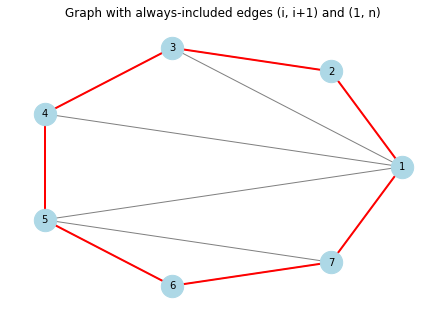

Clique 1


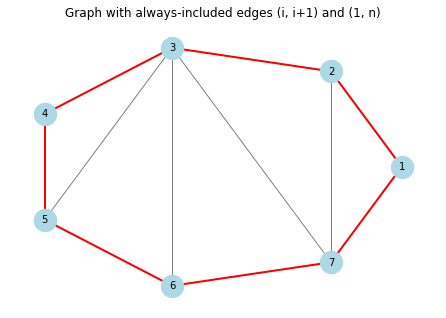

Clique 1


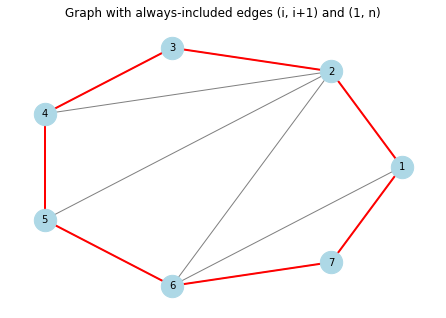

Clique 2


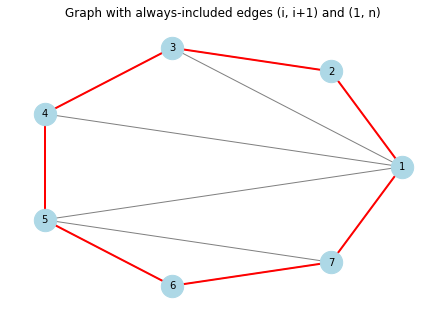

Clique 2


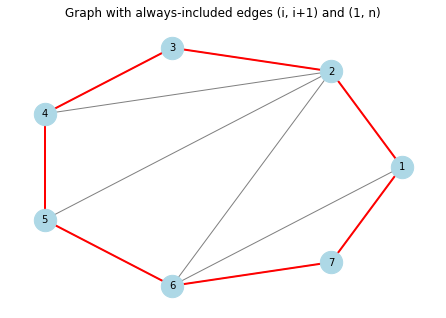

Clique 2


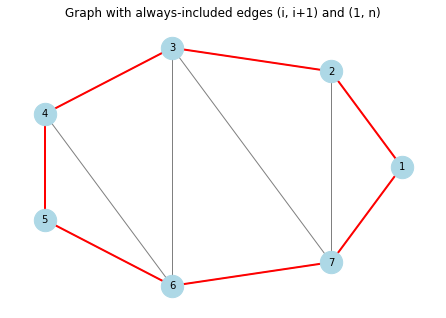

Clique 3


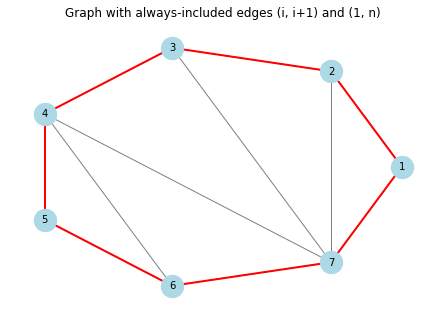

Clique 3


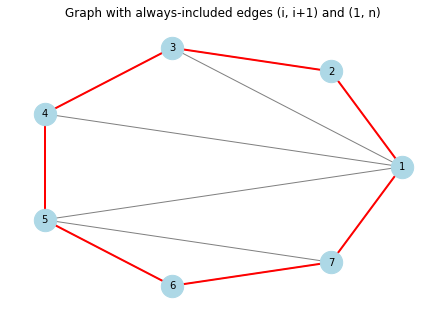

Clique 3


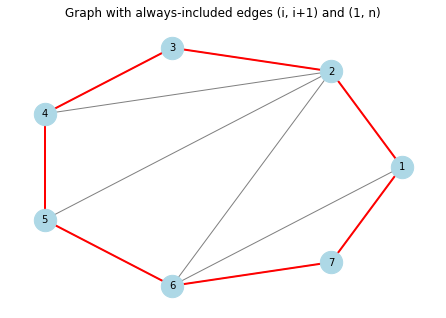

Clique 4


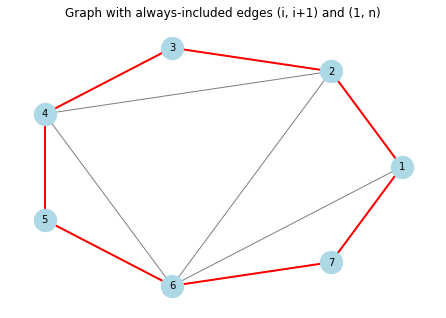

Clique 4


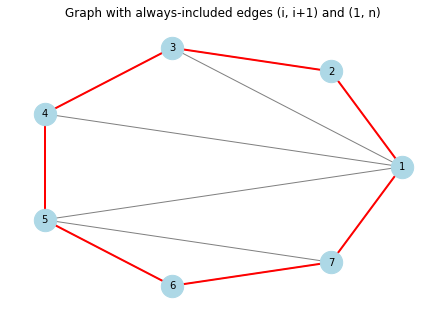

Clique 4


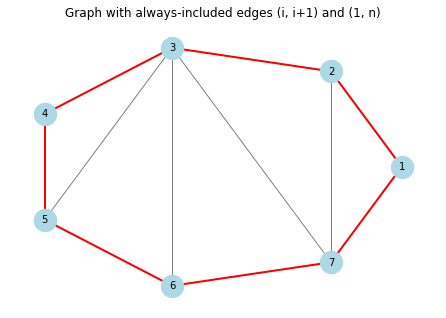

Clique 5


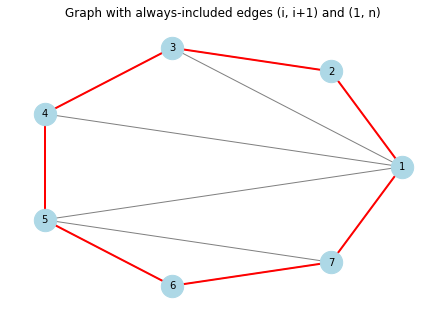

Clique 5


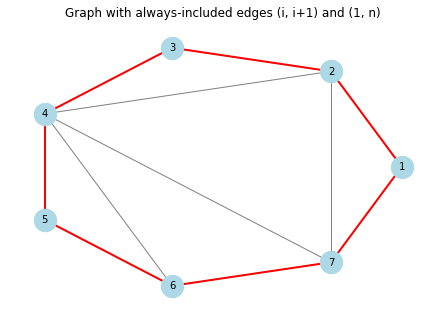

Clique 5


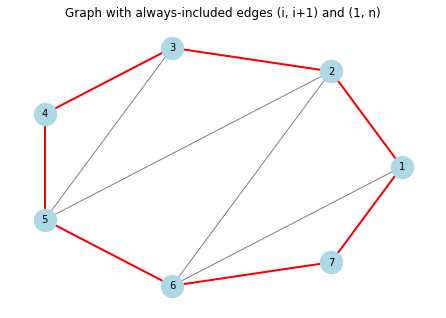

Clique 6


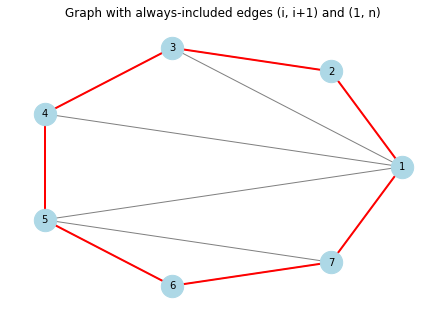

Clique 6


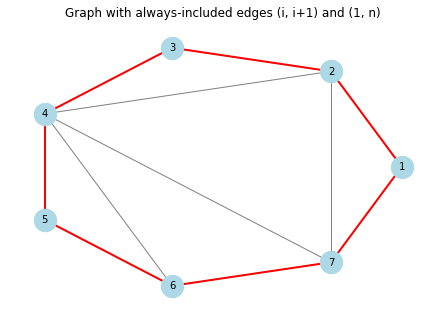

Clique 6


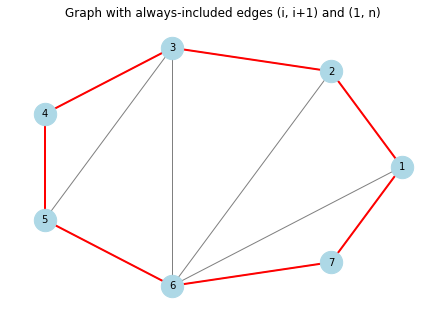

Clique 7


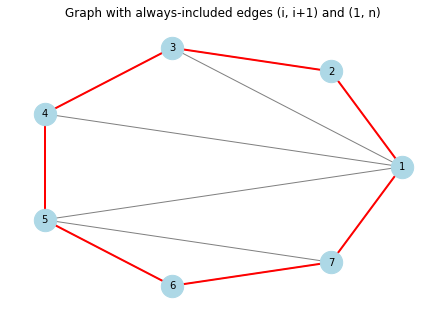

Clique 7


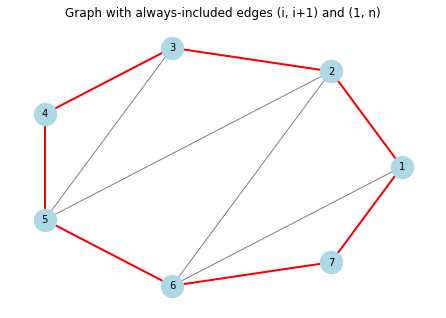

Clique 7


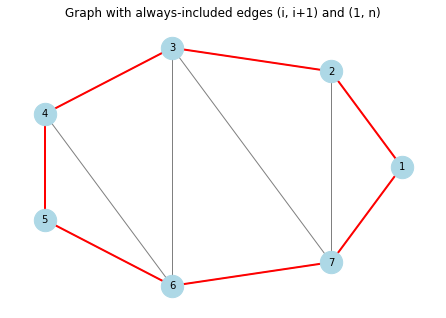

Clique 8


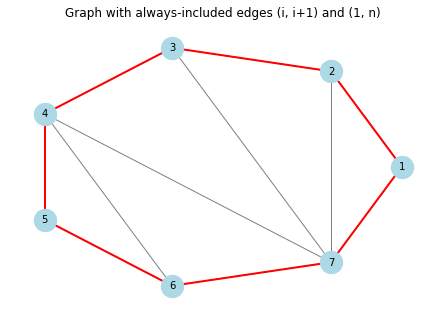

Clique 8


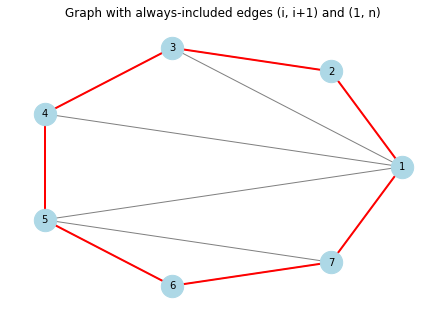

Clique 8


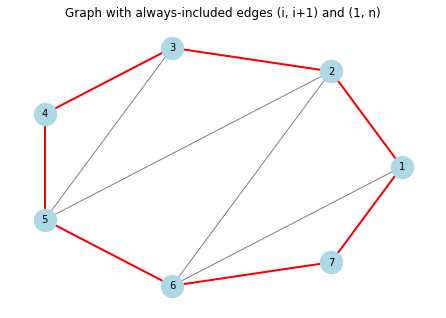

Clique 9


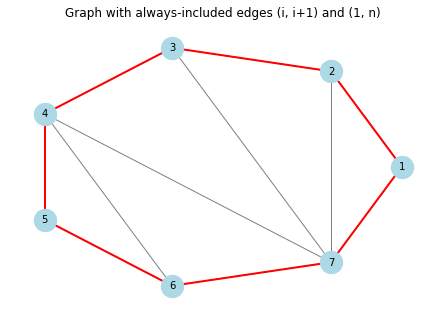

Clique 9


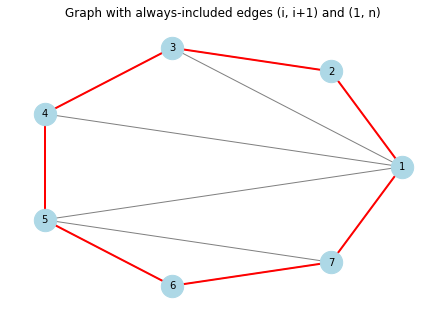

Clique 9


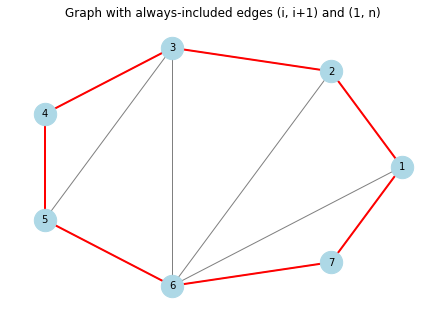

Clique 10


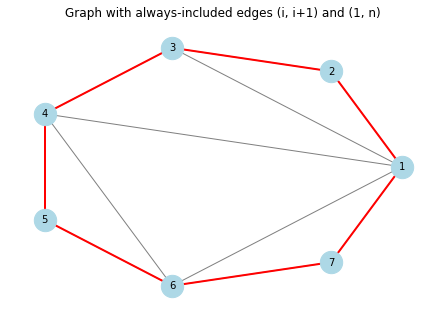

Clique 10


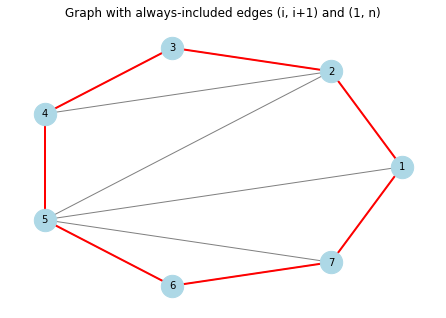

Clique 10


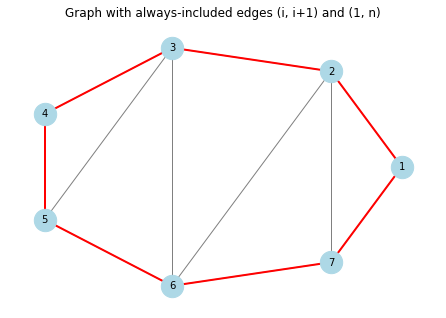

Clique 11


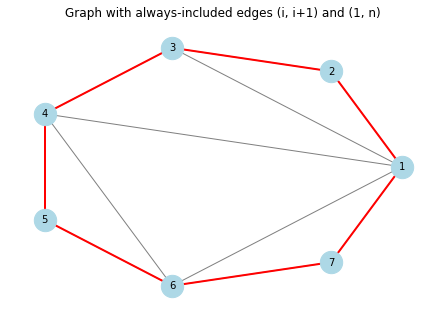

Clique 11


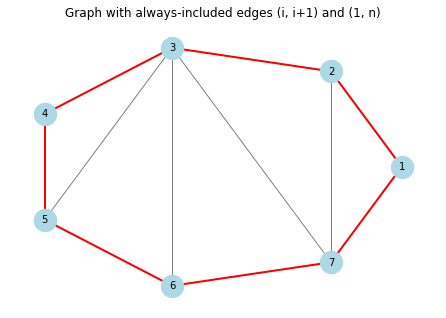

Clique 11


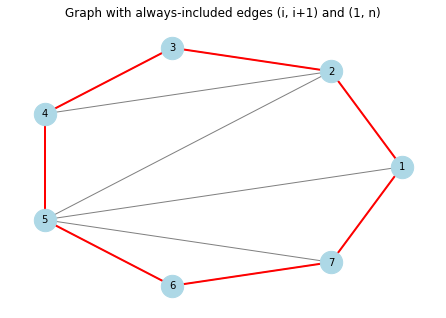

Clique 12


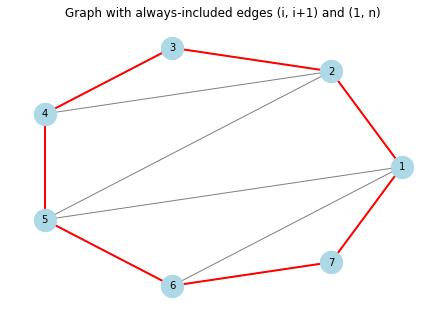

Clique 12


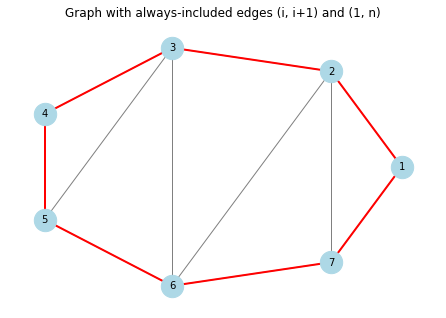

Clique 12


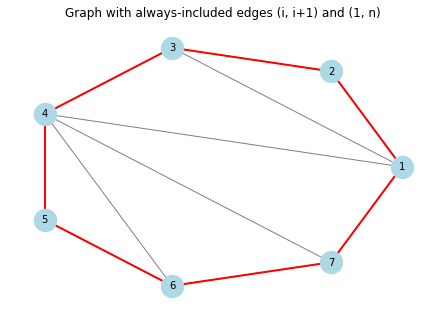

Clique 13


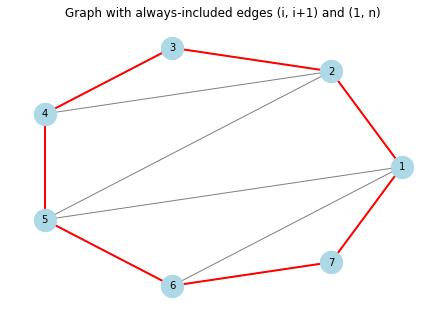

Clique 13


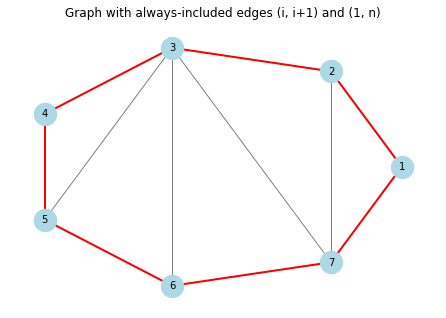

Clique 13


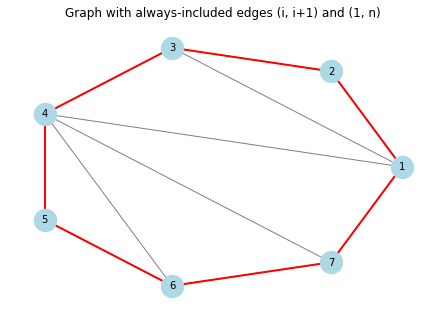

Clique 14


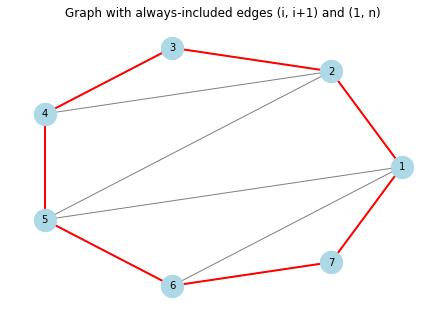

Clique 14


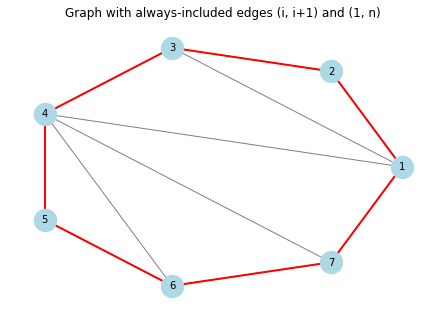

Clique 14


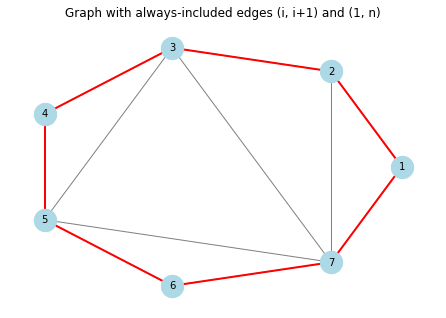

Clique 15


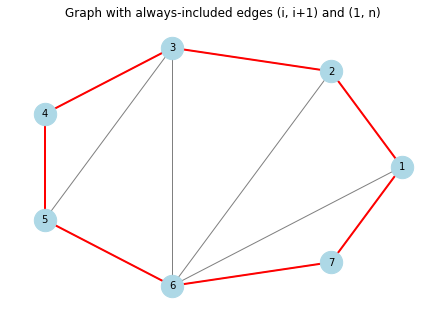

Clique 15


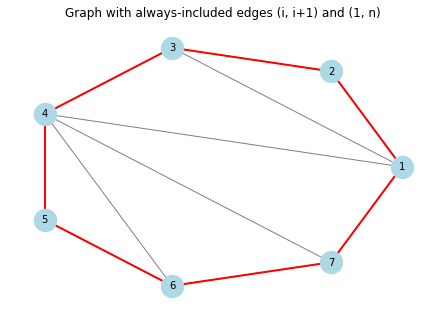

Clique 15


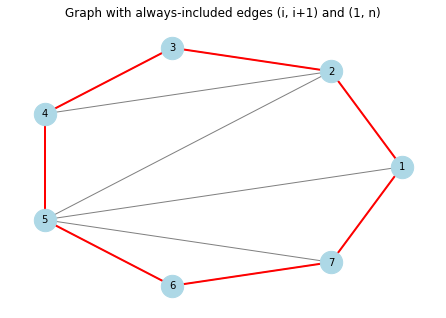

Clique 16


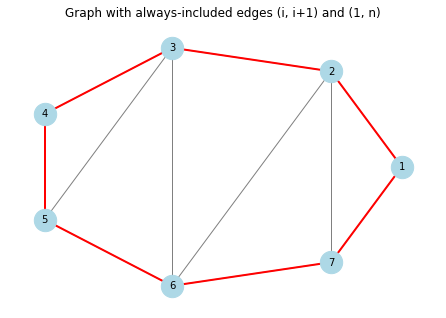

Clique 16


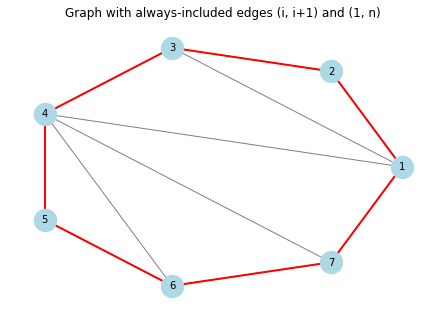

Clique 16


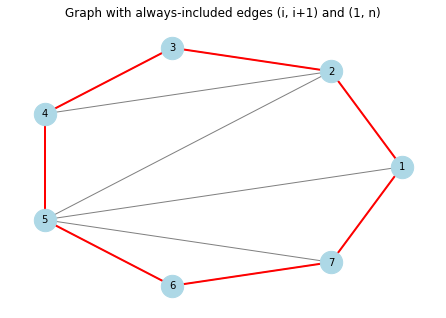

Clique 17


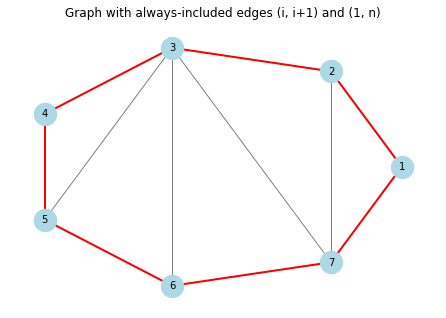

Clique 17


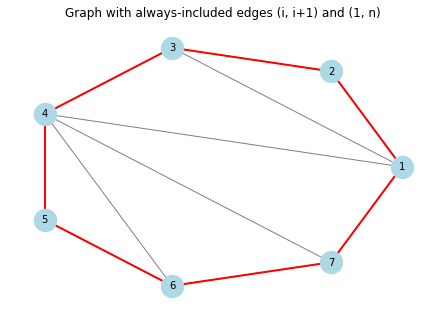

Clique 17


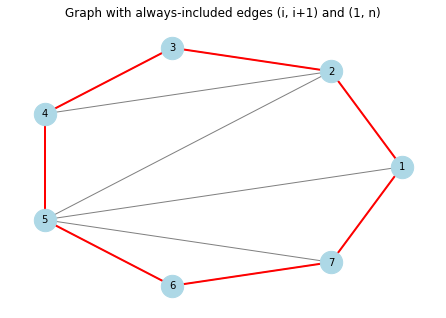

Clique 18


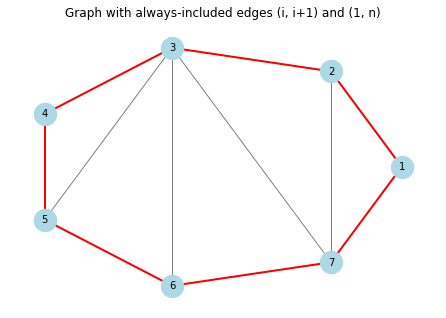

Clique 18


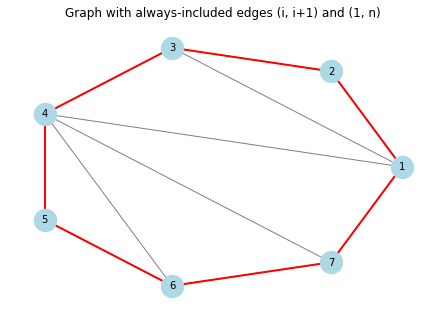

Clique 18


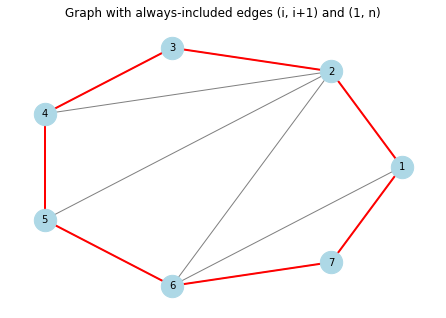

Clique 19


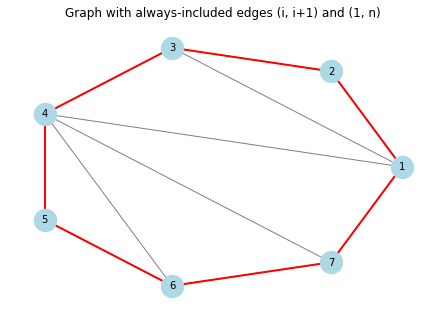

Clique 19


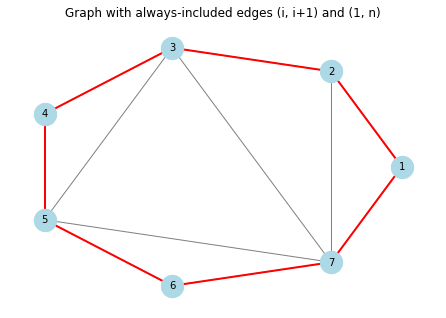

Clique 19


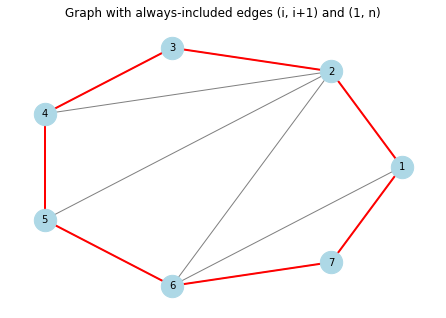

Clique 20


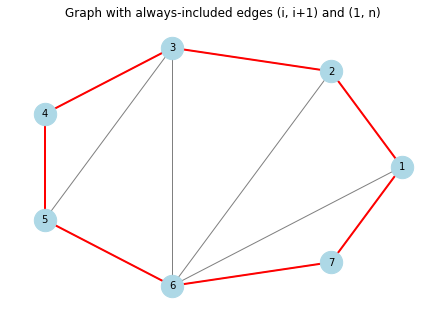

Clique 20


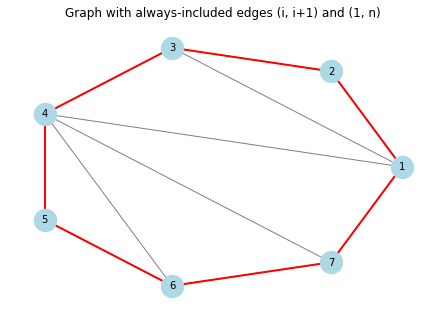

Clique 20


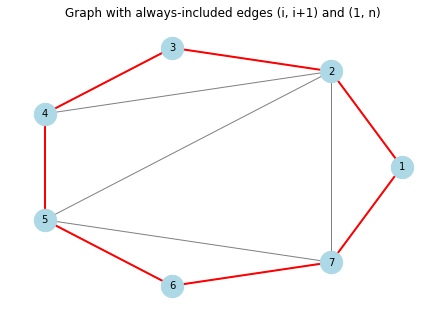

Clique 21


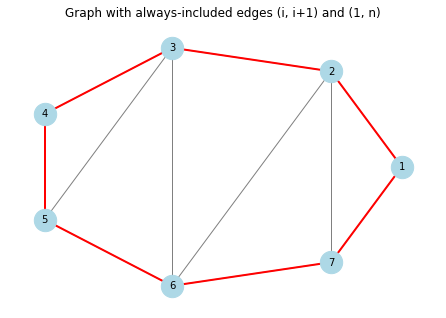

Clique 21


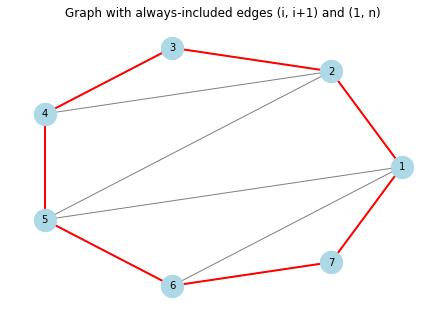

Clique 21


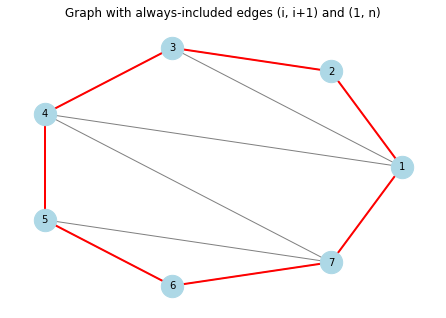

Clique 22


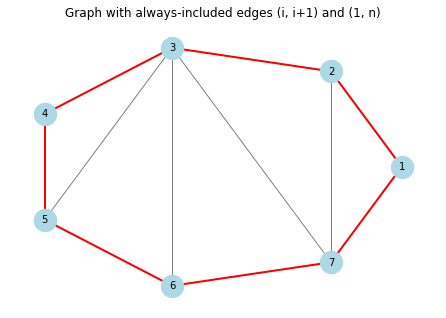

Clique 22


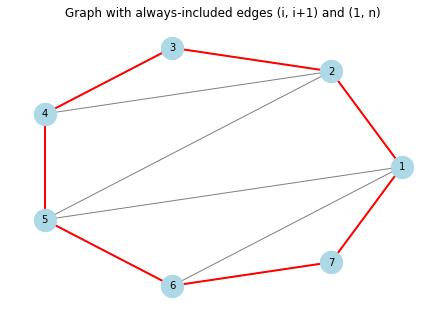

Clique 22


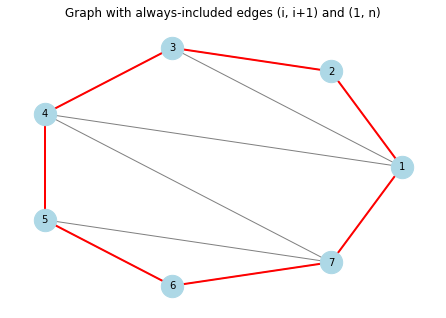

Clique 23


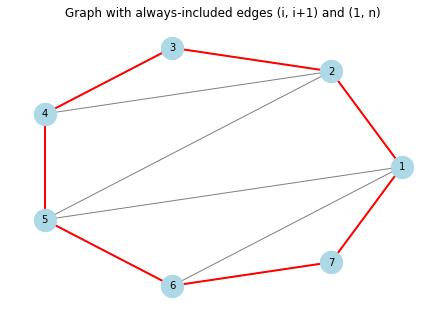

Clique 23


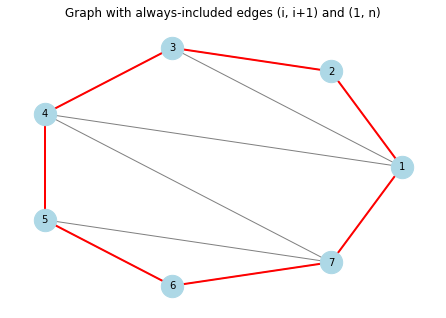

Clique 23


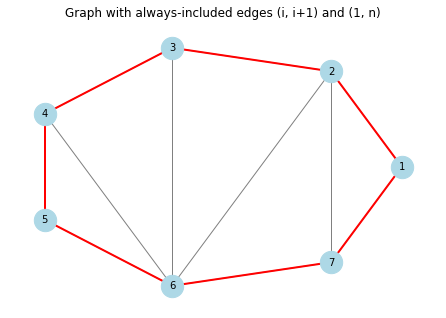

Clique 24


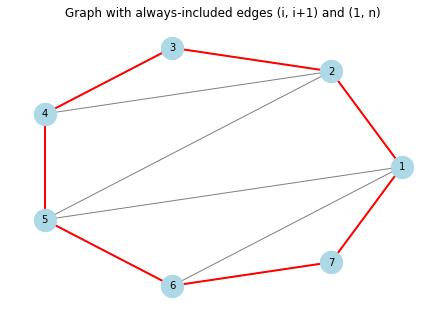

Clique 24


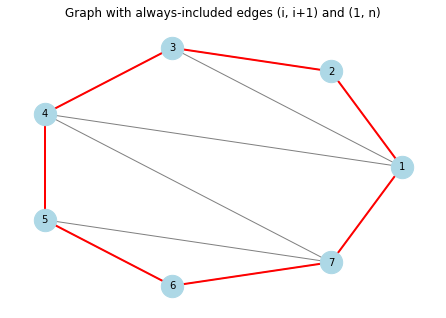

Clique 24


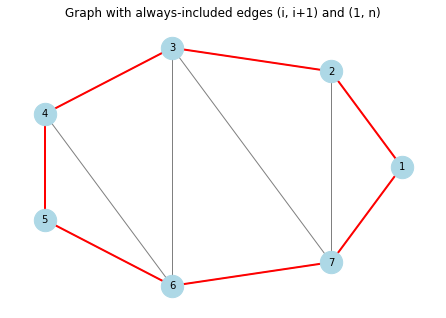

Clique 25


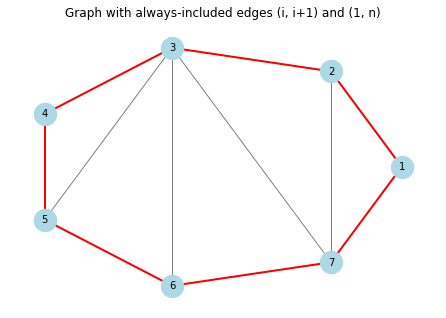

Clique 25


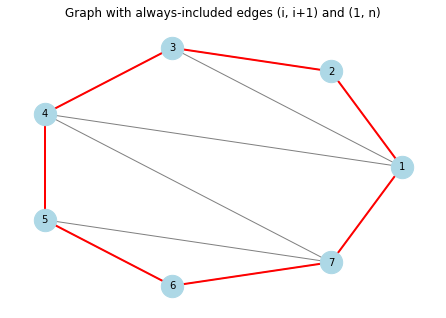

Clique 25


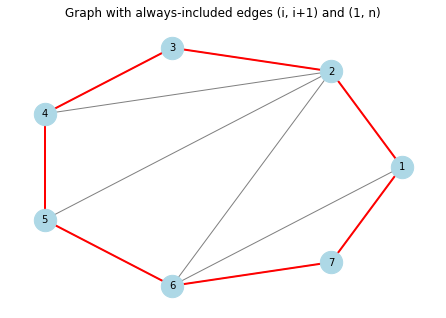

Clique 26


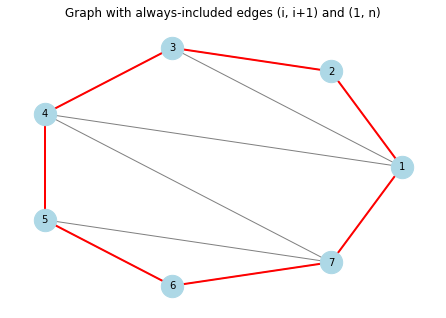

Clique 26


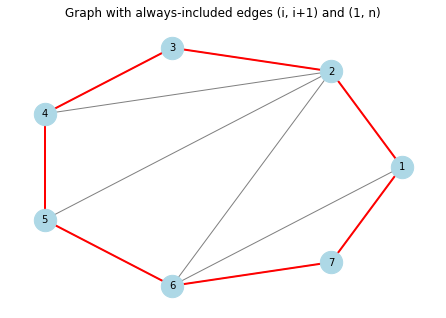

Clique 26


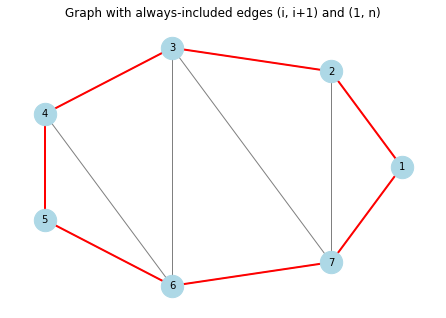

Clique 27


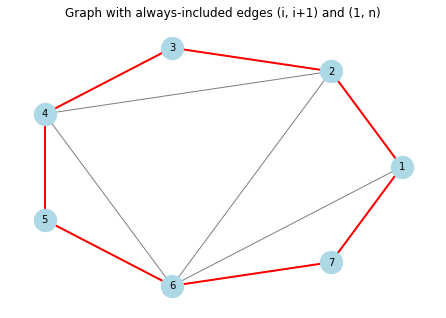

Clique 27


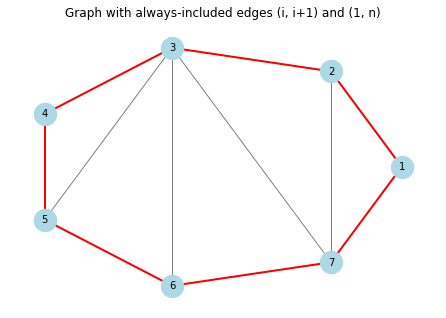

Clique 27


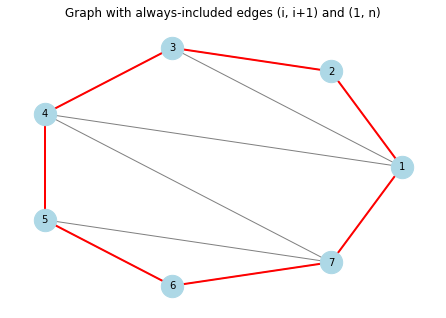

Clique 28


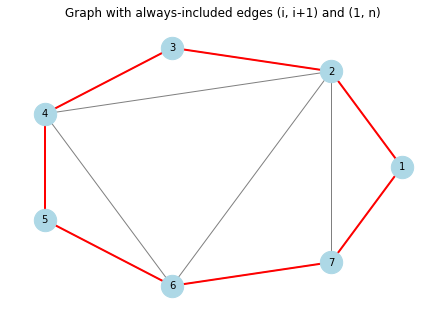

Clique 28


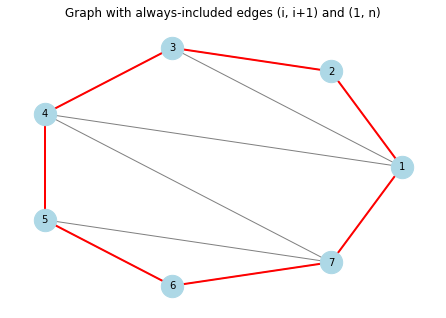

Clique 28


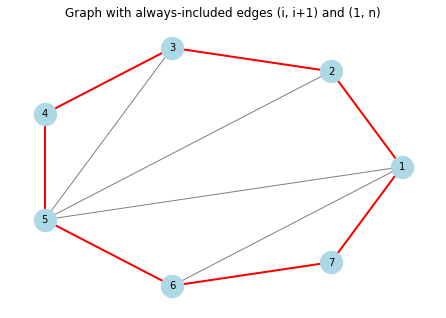

Clique 29


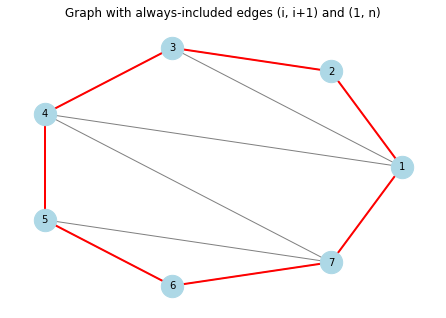

Clique 29


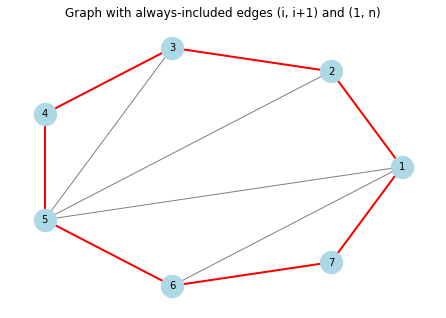

Clique 29


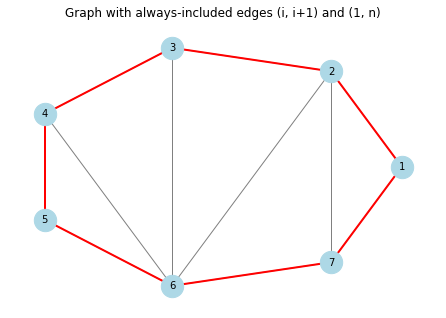

Clique 30


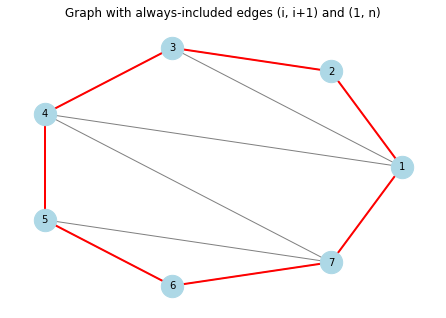

Clique 30


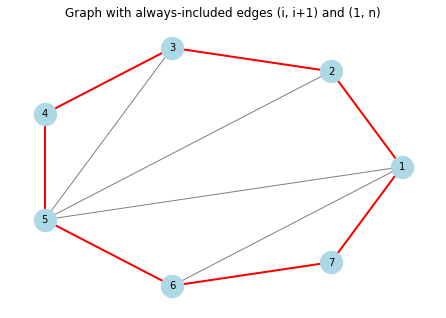

Clique 30


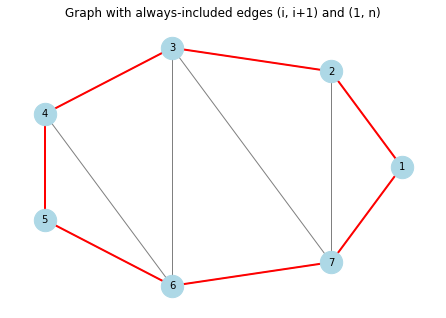

Clique 31


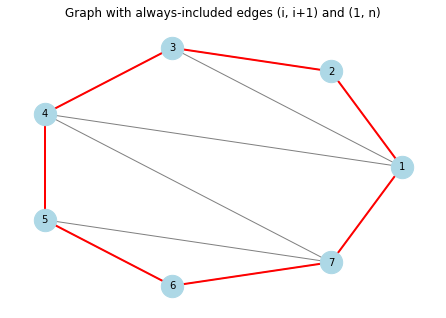

Clique 31


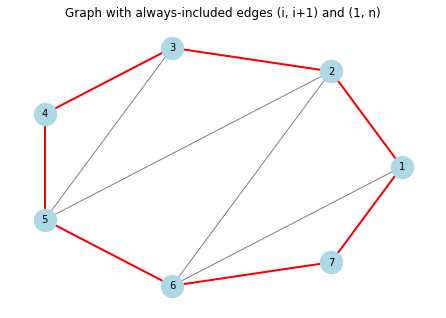

Clique 31


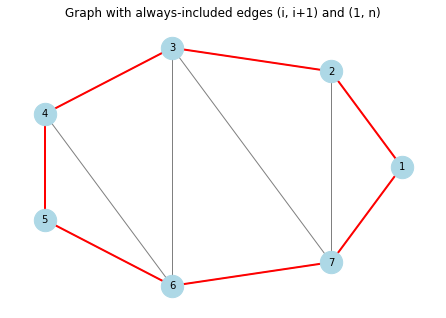

Clique 32


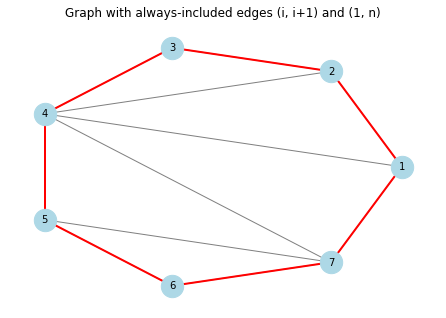

Clique 32


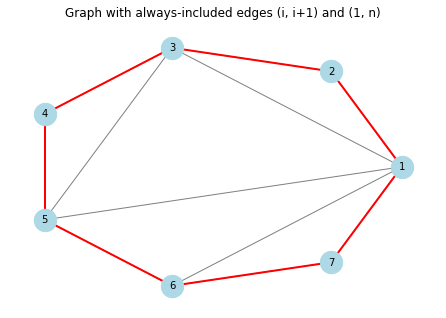

Clique 32


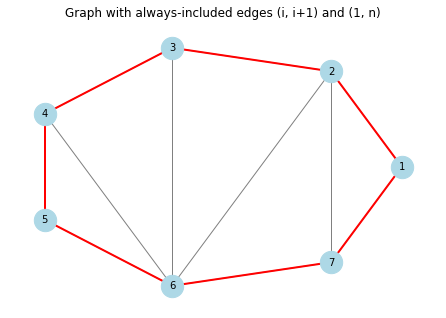

Clique 33


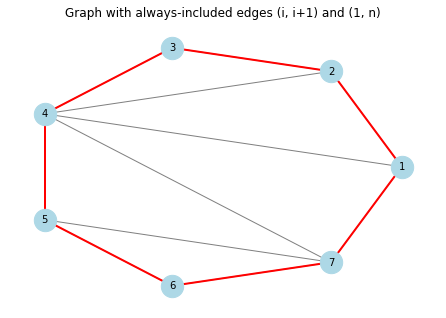

Clique 33


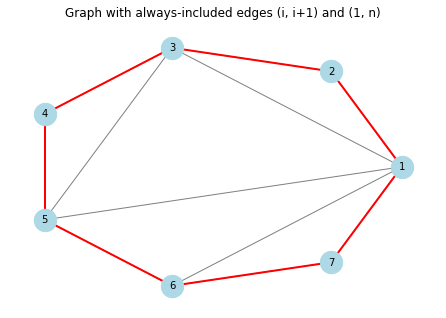

Clique 33


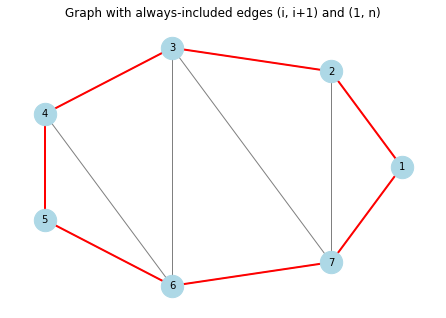

Clique 34


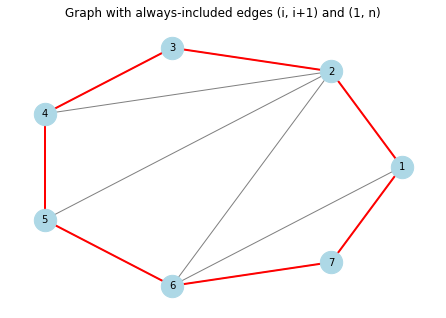

Clique 34


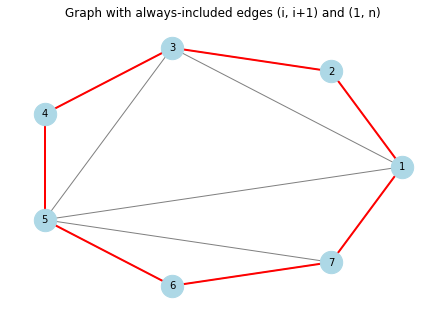

Clique 34


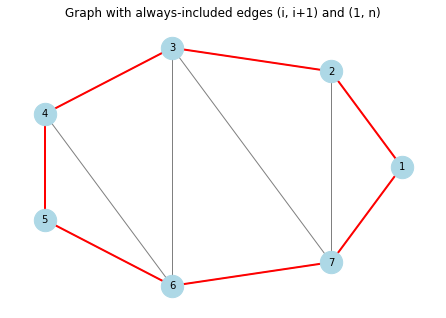

Clique 35


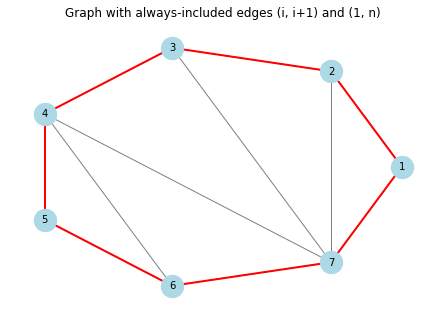

Clique 35


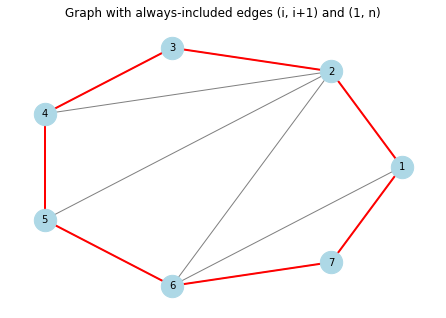

Clique 35


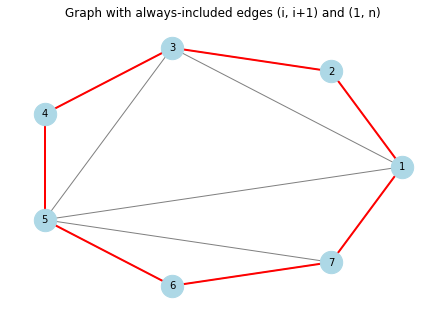

Clique 36


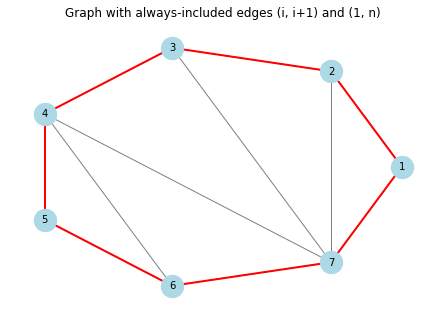

Clique 36


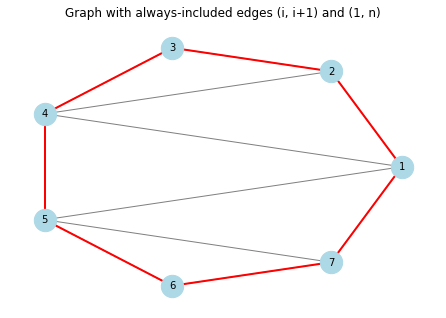

Clique 36


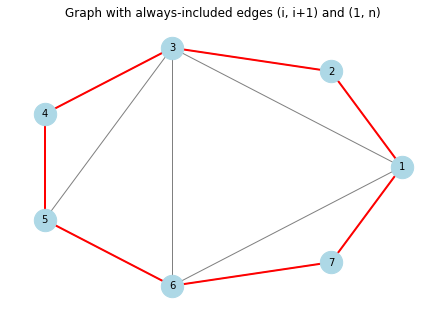

Clique 37


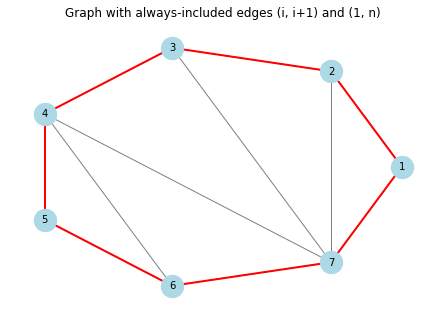

Clique 37


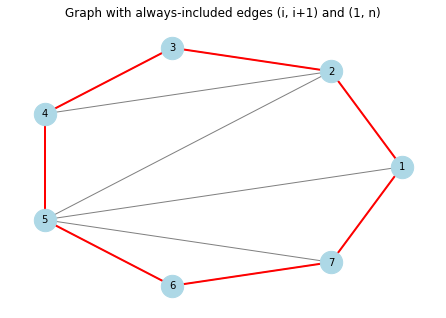

Clique 37


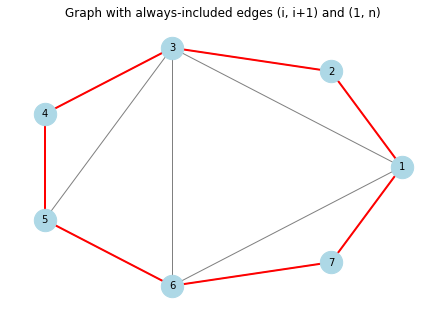

Clique 38


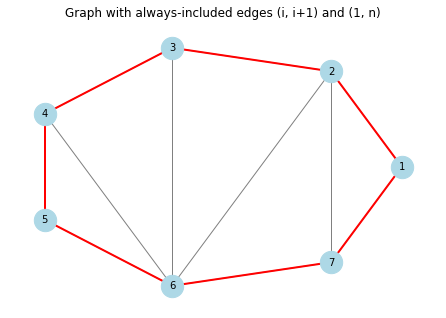

Clique 38


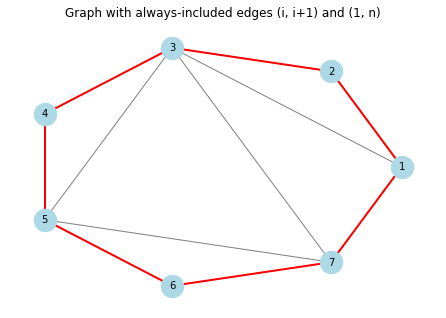

Clique 38


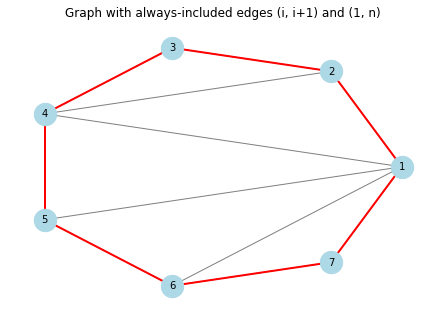

Clique 39


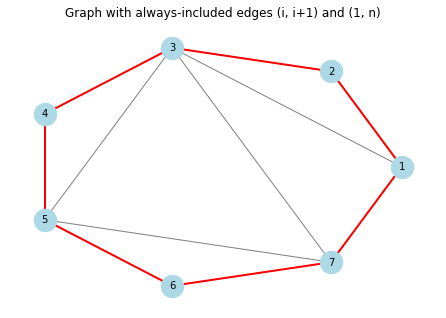

Clique 39


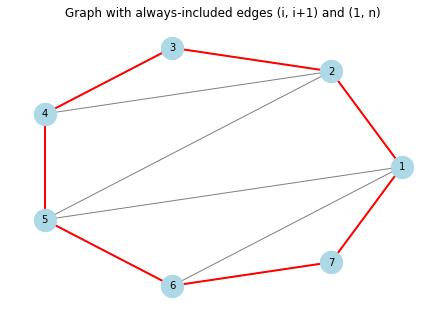

Clique 39


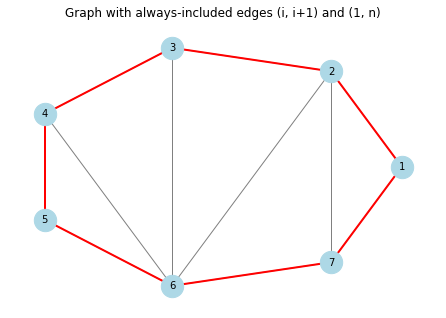

Clique 40


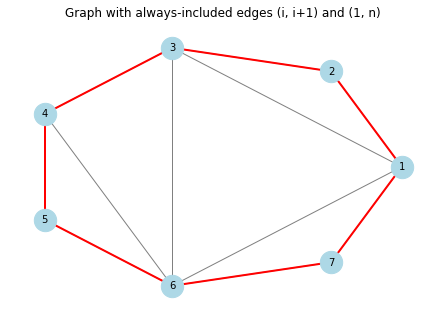

Clique 40


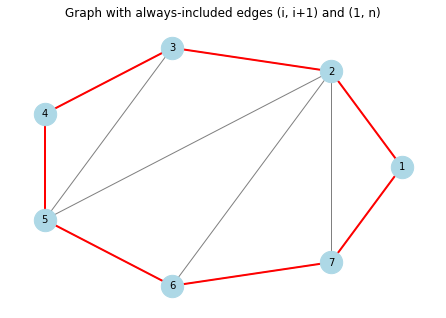

Clique 40


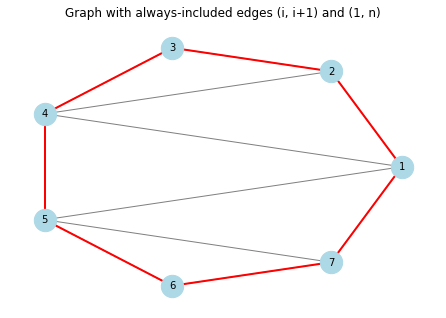

Clique 41


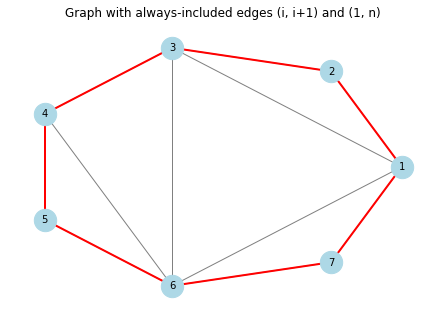

Clique 41


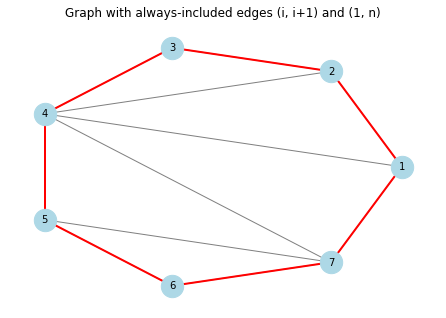

Clique 41


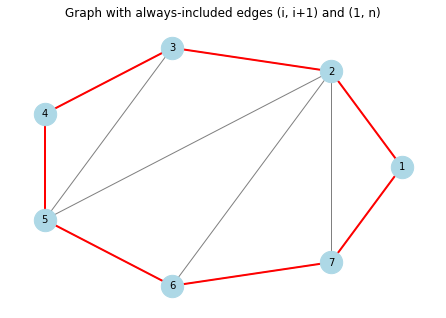

Clique 42


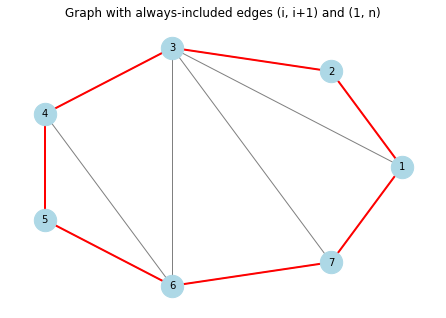

Clique 42


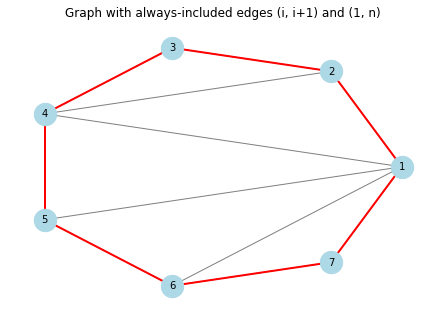

Clique 42


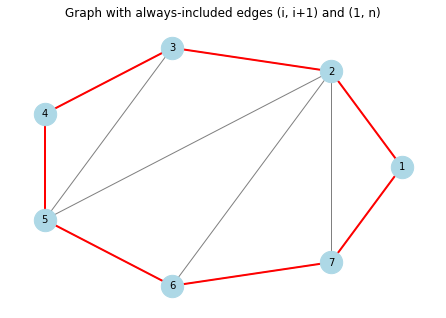

Clique 43


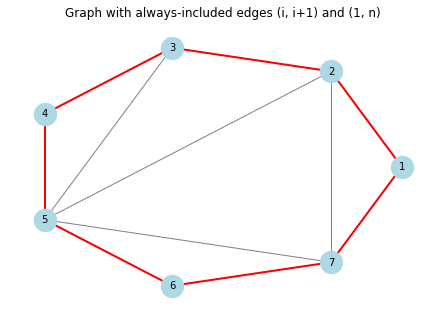

Clique 43


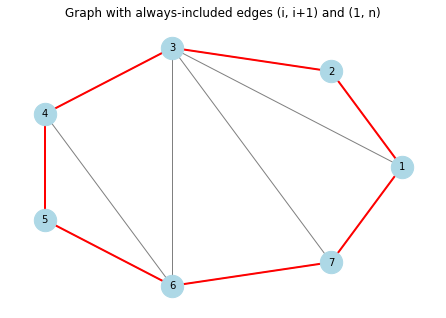

Clique 43


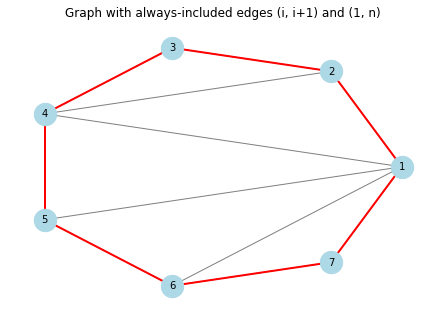

Clique 44


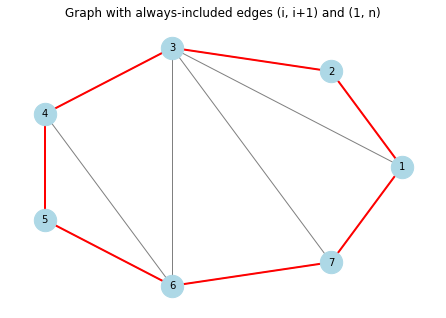

Clique 44


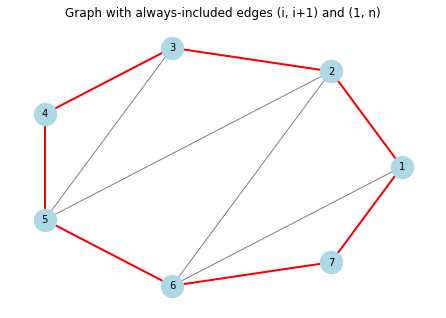

Clique 44


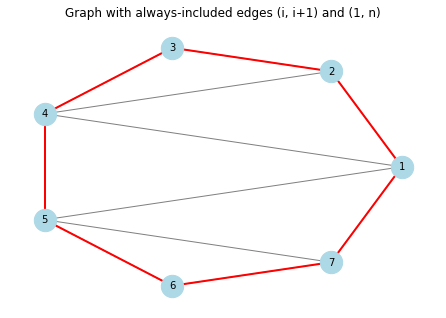

Clique 45


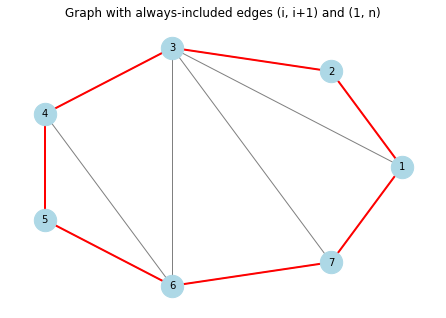

Clique 45


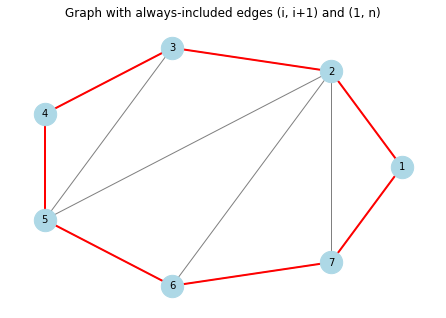

Clique 45


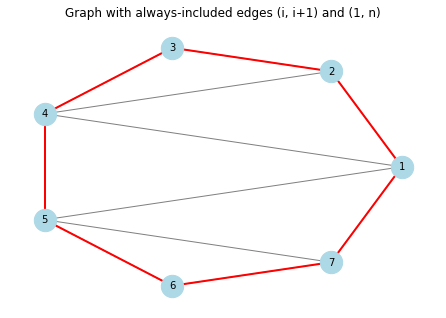

Clique 46


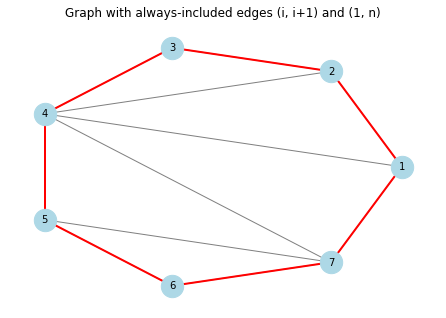

Clique 46


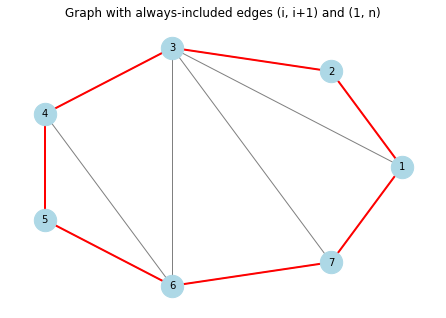

Clique 46


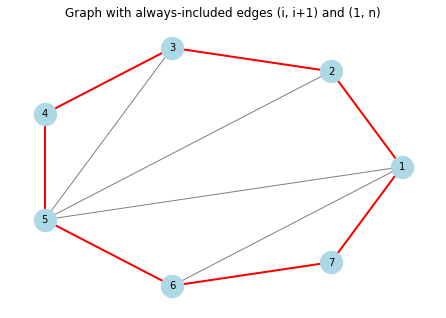

Clique 47


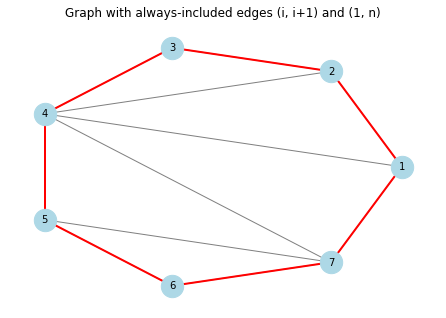

Clique 47


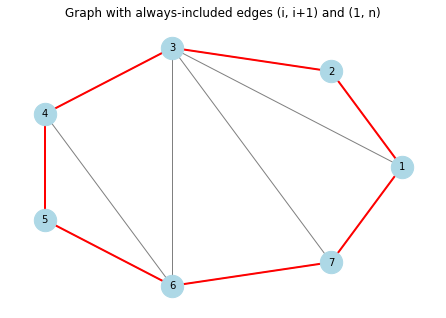

Clique 47


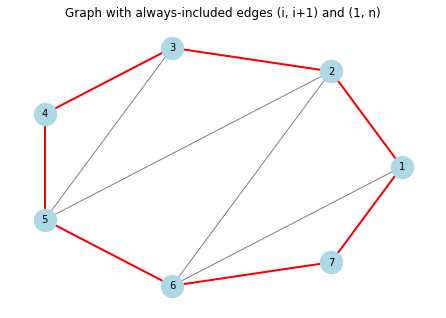

Clique 48


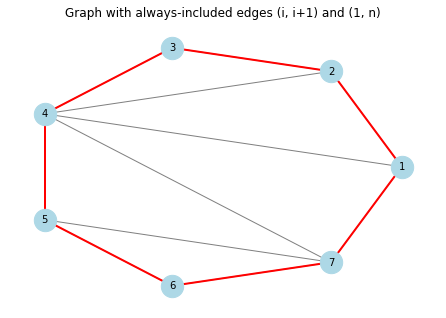

Clique 48


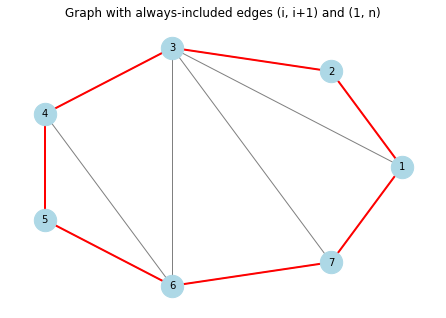

Clique 48


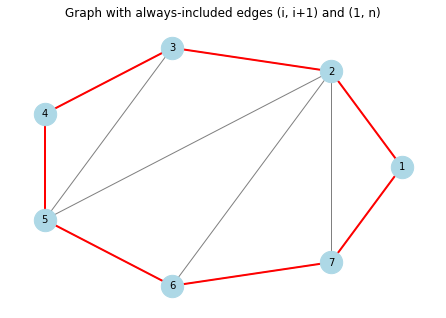

Clique 49


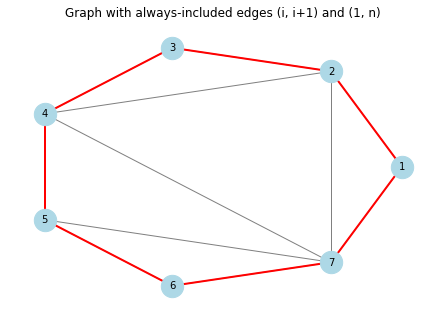

Clique 49


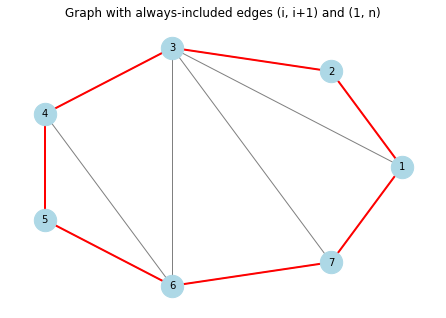

Clique 49


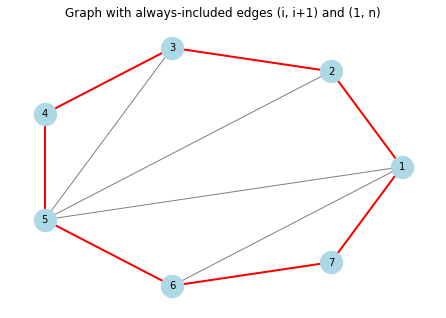

Clique 50


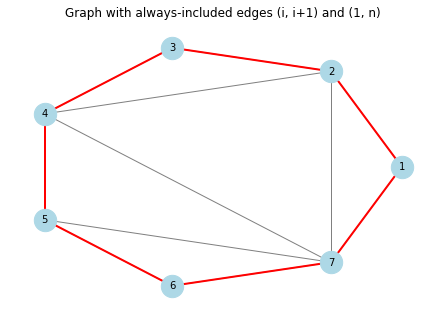

Clique 50


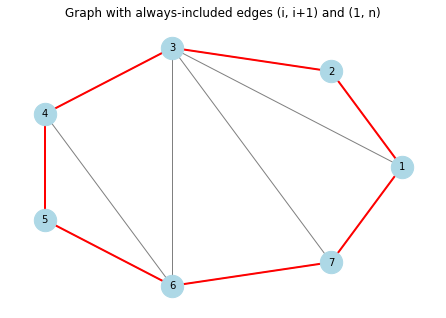

Clique 50


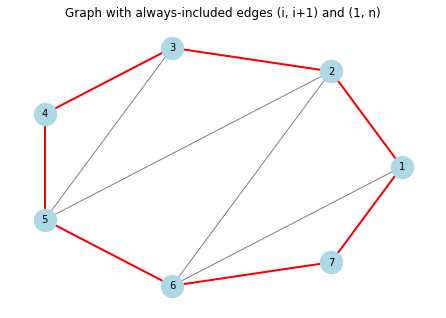

Clique 51


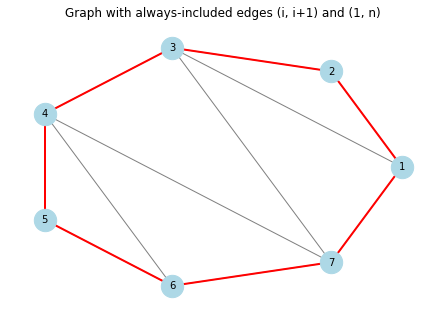

Clique 51


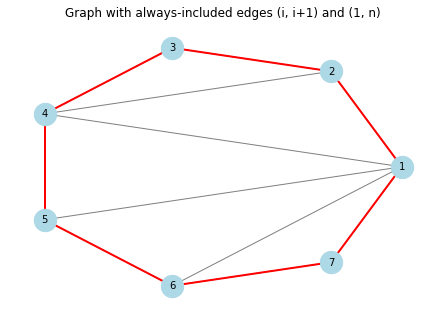

Clique 51


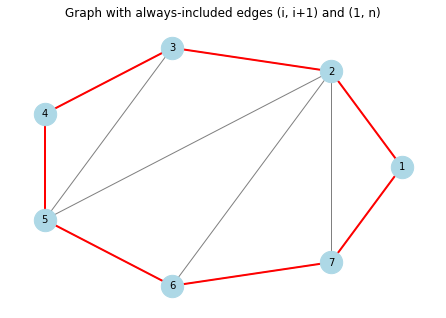

Clique 52


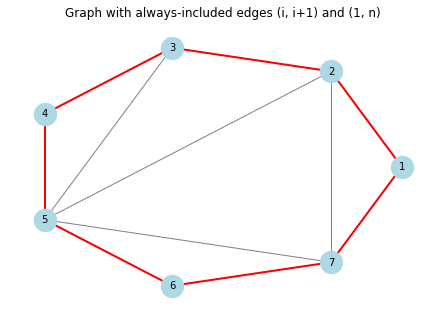

Clique 52


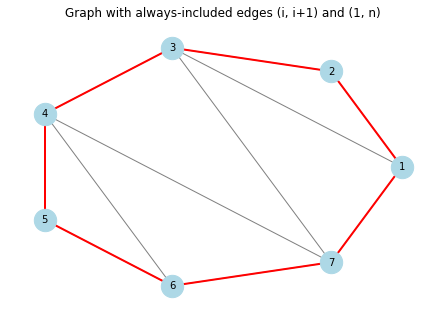

Clique 52


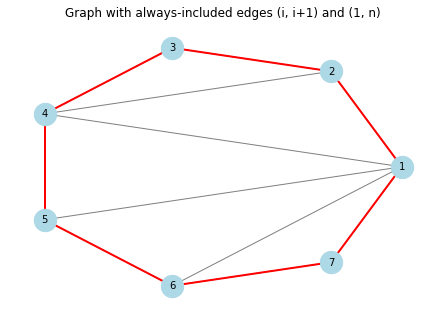

Clique 53


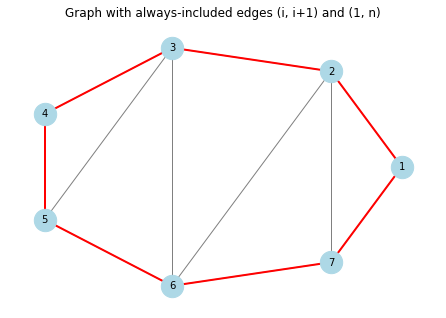

Clique 53


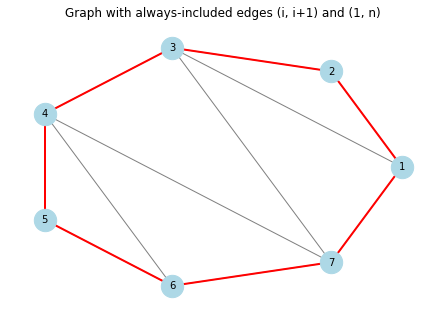

Clique 53


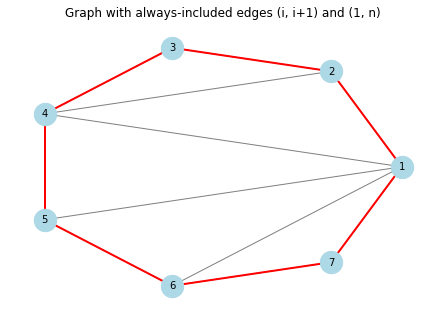

Clique 54


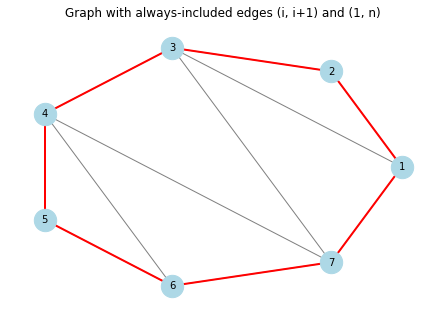

Clique 54


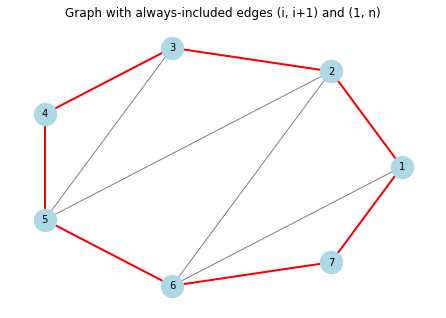

Clique 54


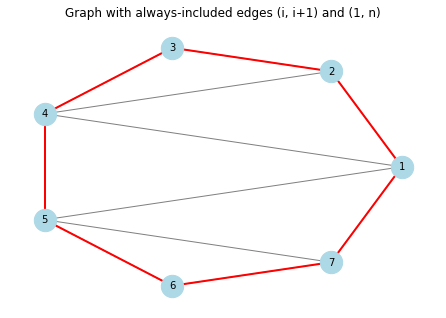

Clique 55


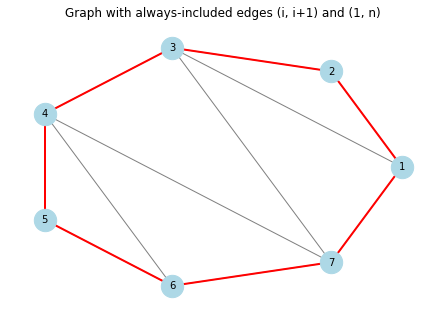

Clique 55


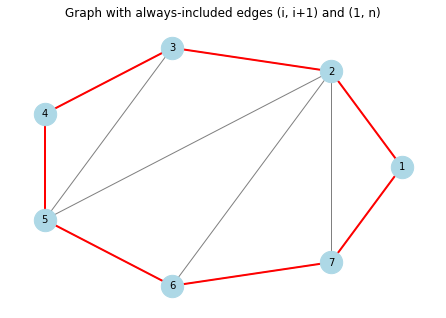

Clique 55


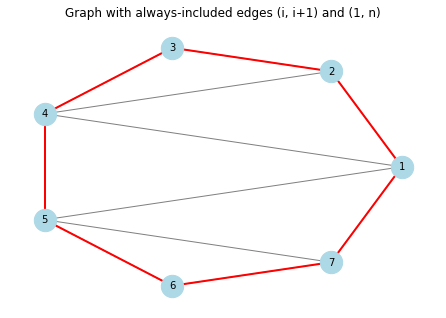

Clique 56


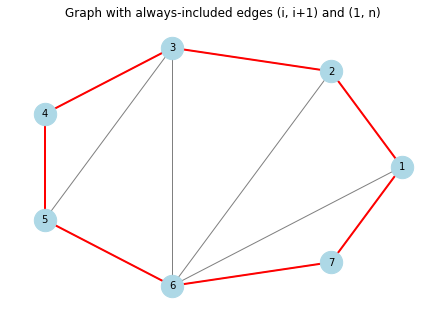

Clique 56


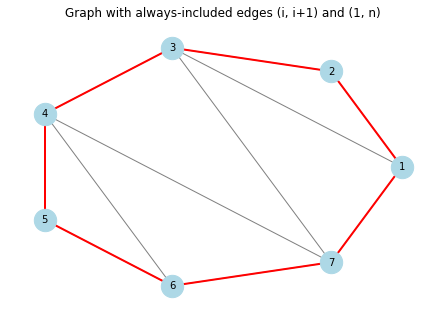

Clique 56


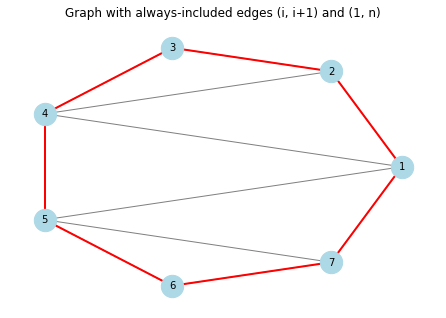

Clique 57


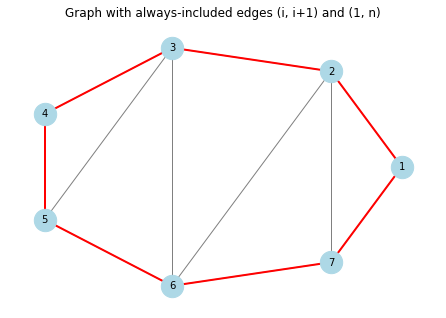

Clique 57


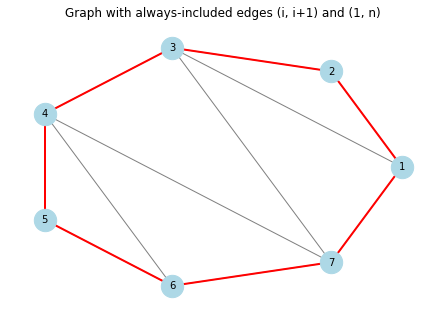

Clique 57


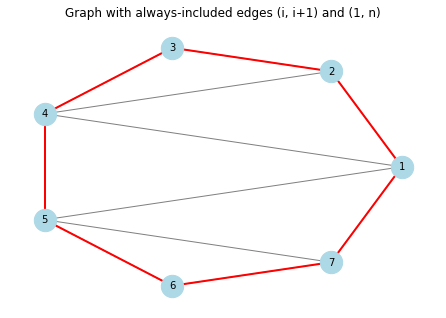

Clique 58


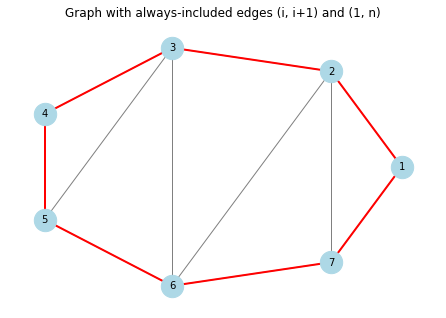

Clique 58


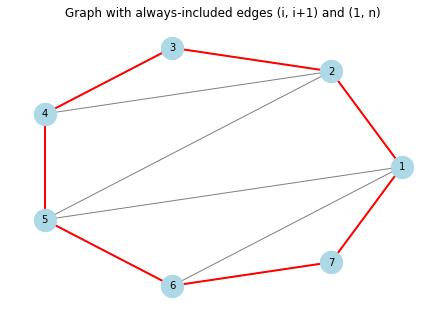

Clique 58


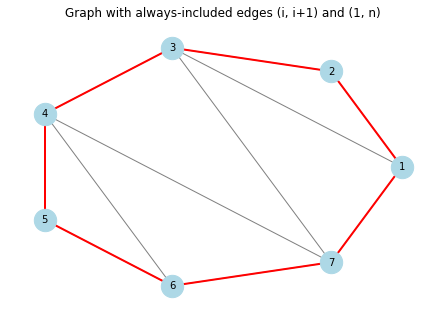

Clique 59


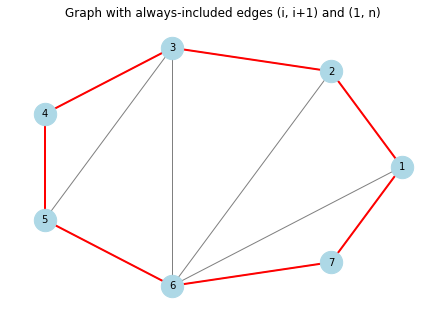

Clique 59


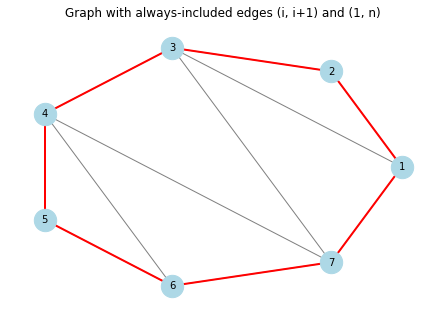

Clique 59


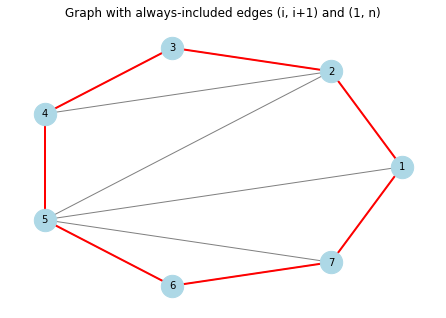

Clique 60


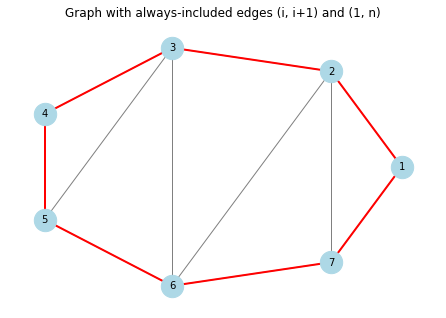

Clique 60


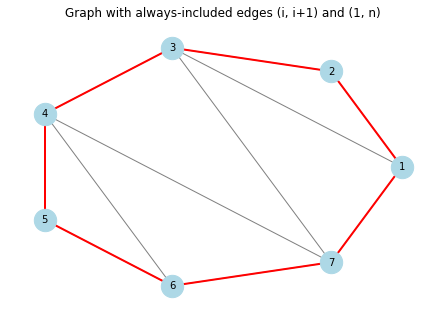

Clique 60


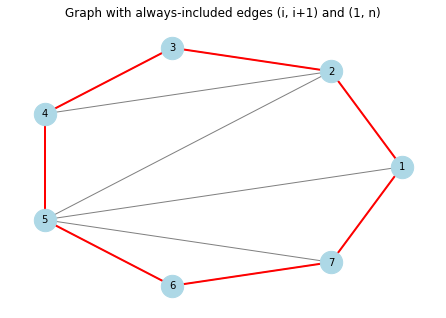

Clique 61


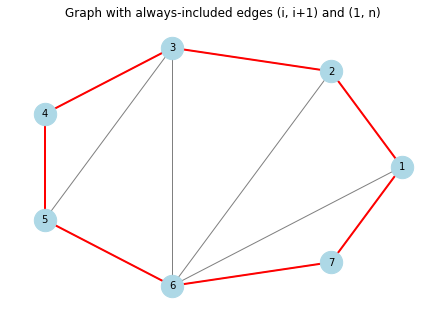

Clique 61


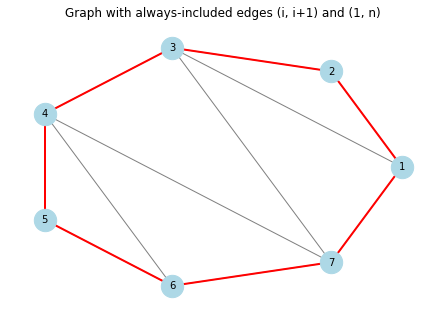

Clique 61


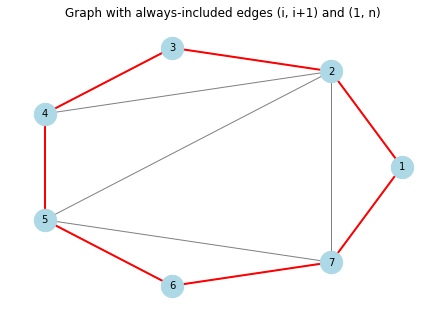

Clique 62


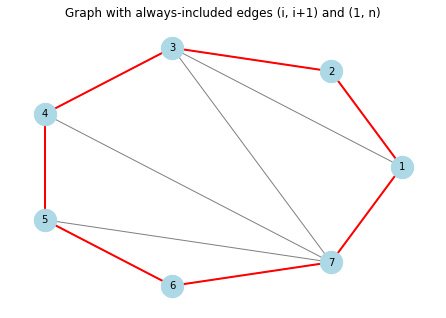

Clique 62


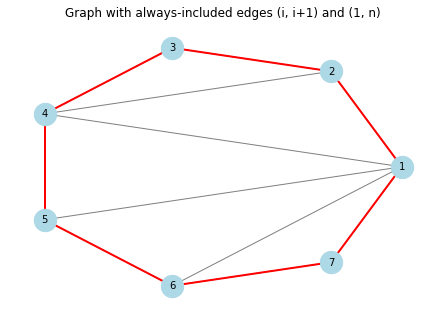

Clique 62


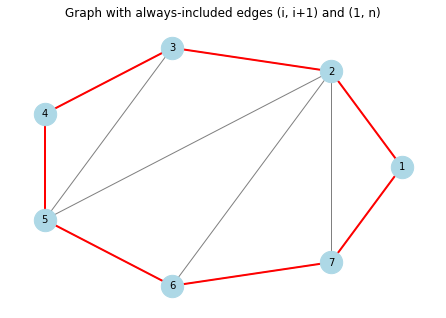

Clique 63


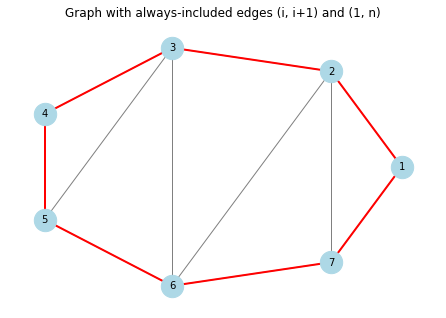

Clique 63


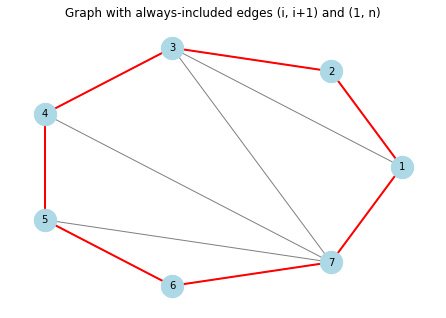

Clique 63


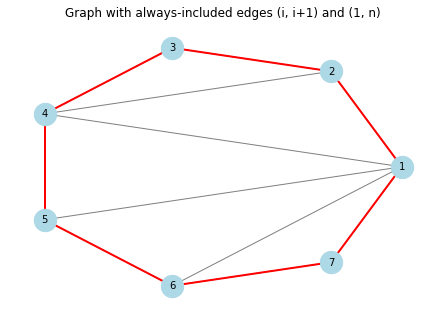

Clique 64


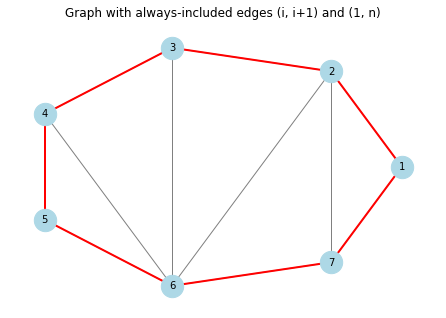

Clique 64


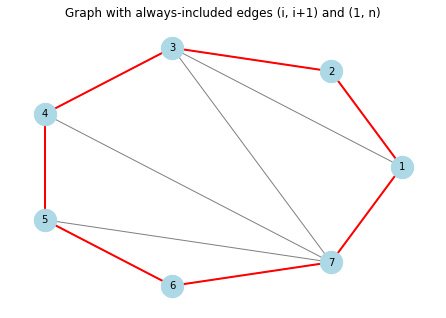

Clique 64


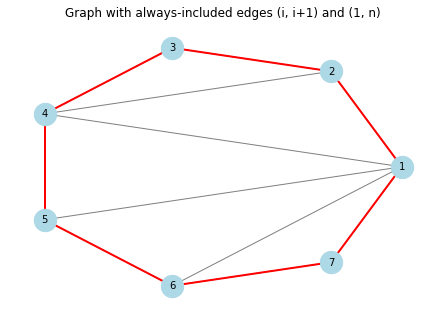

Clique 65


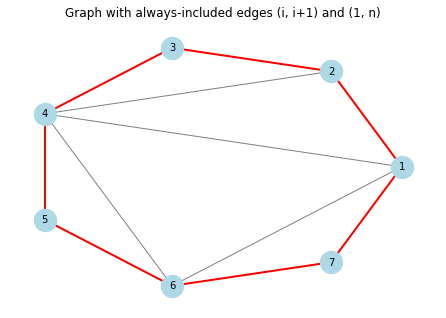

Clique 65


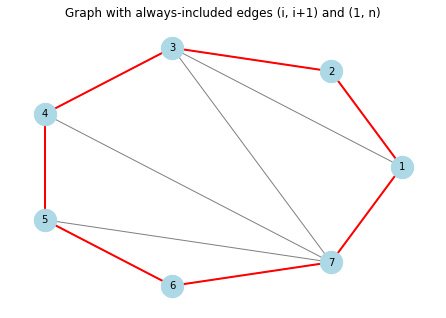

Clique 65


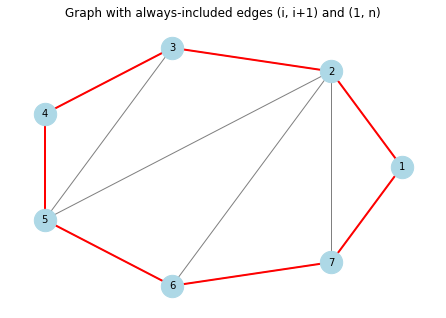

Clique 66


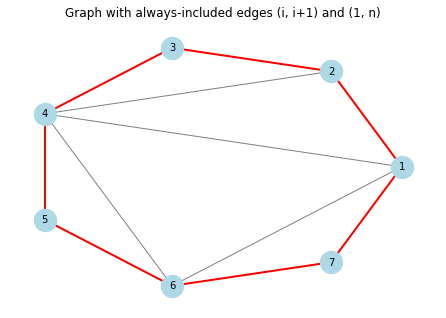

Clique 66


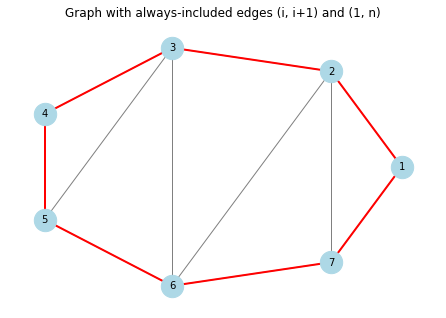

Clique 66


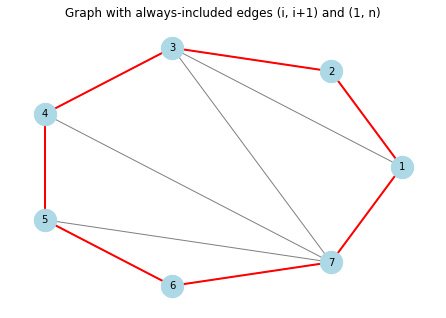

Clique 67


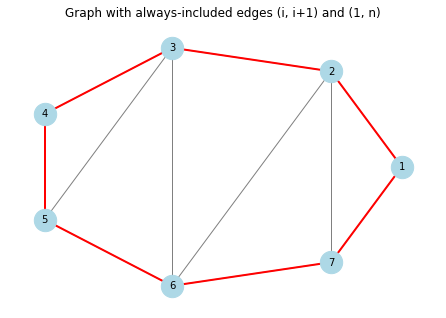

Clique 67


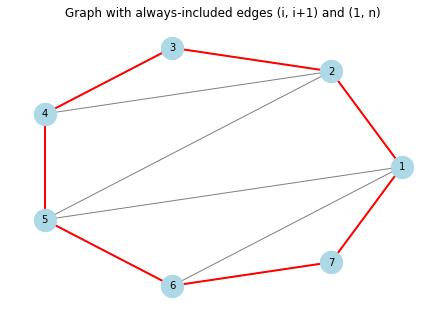

Clique 67


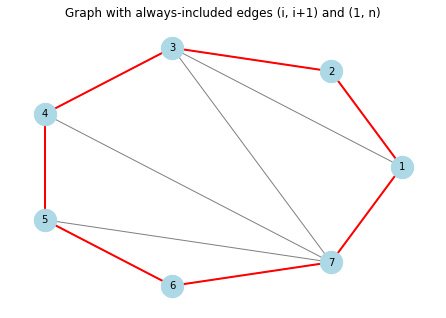

Clique 68


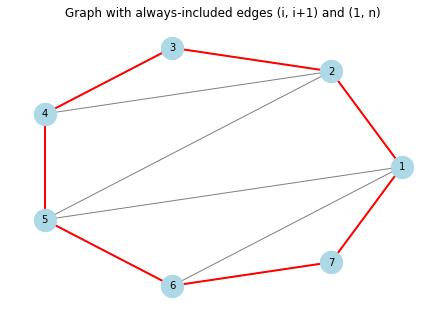

Clique 68


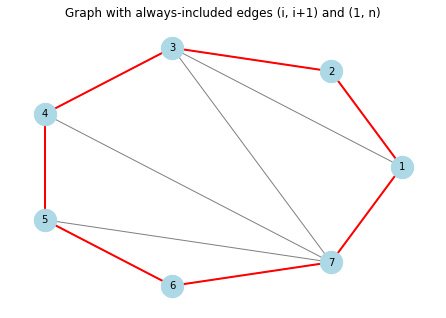

Clique 68


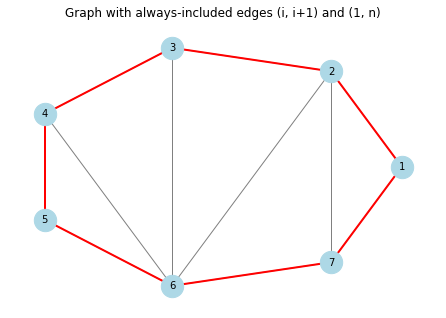

Clique 69


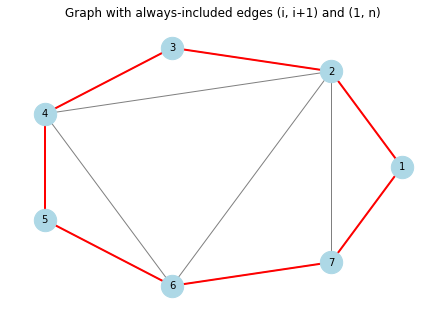

Clique 69


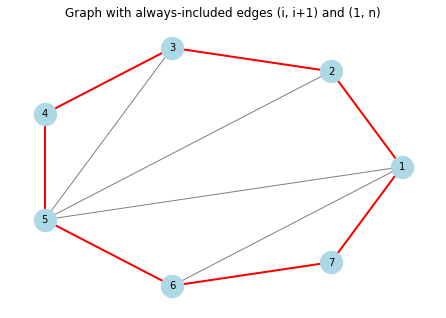

Clique 69


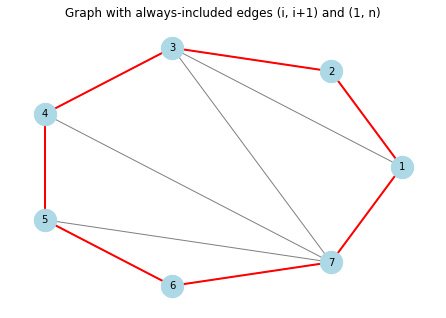

Clique 70


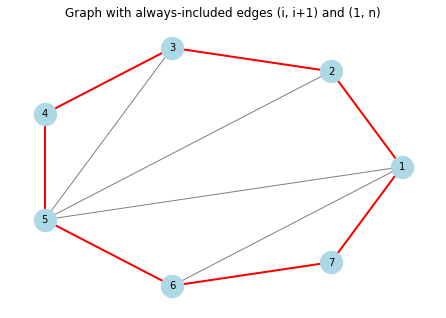

Clique 70


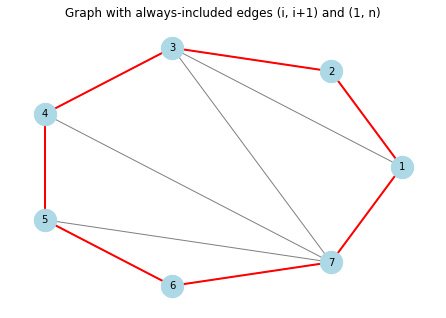

Clique 70


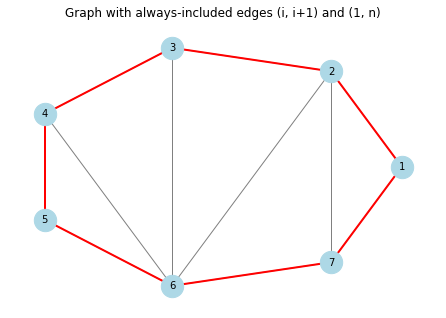

Clique 71


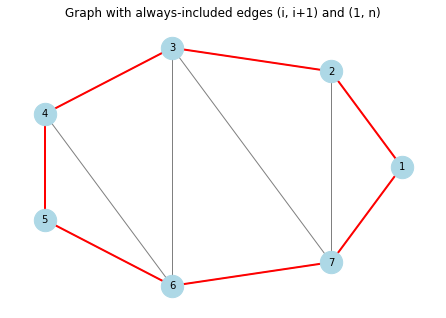

Clique 71


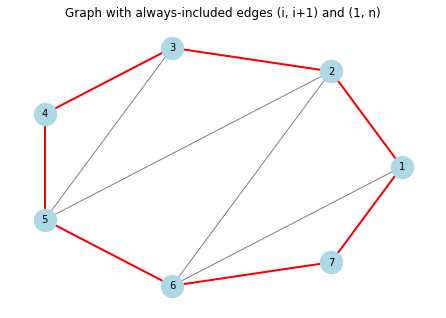

Clique 71


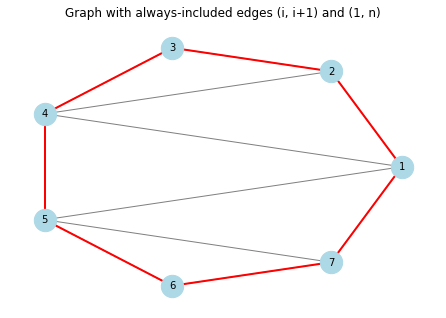

Clique 72


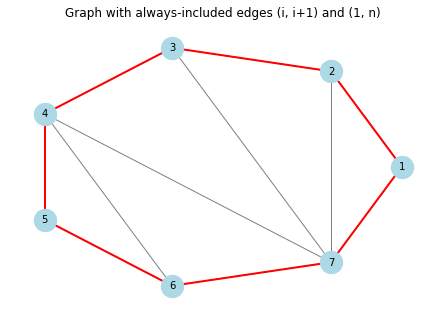

Clique 72


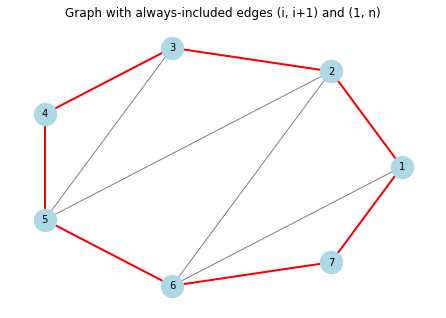

Clique 72


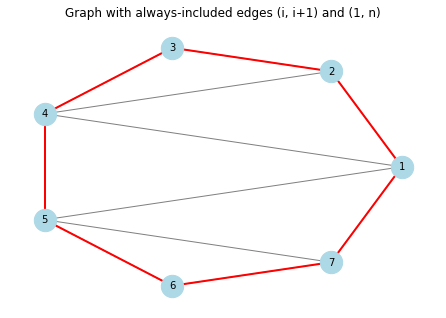

Clique 73


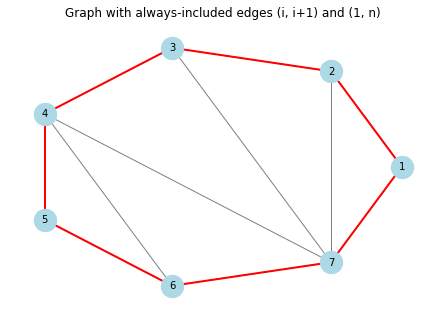

Clique 73


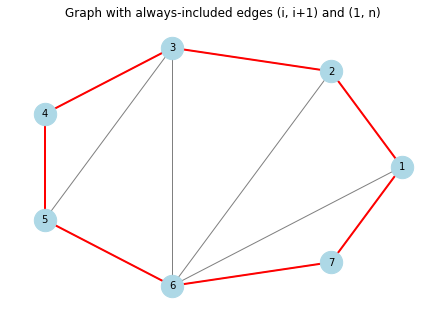

Clique 73


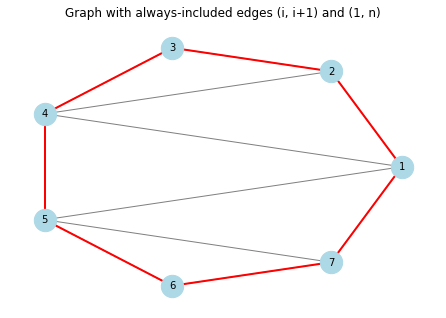

Clique 74


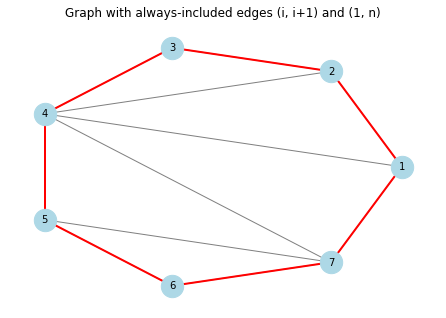

Clique 74


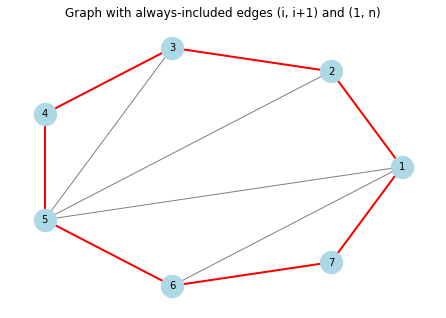

Clique 74


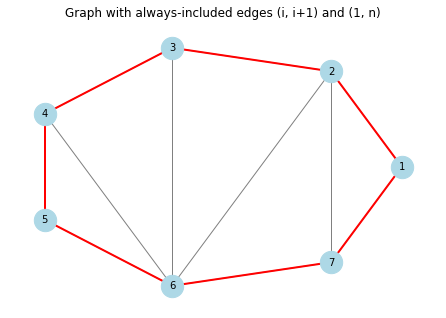

Clique 75


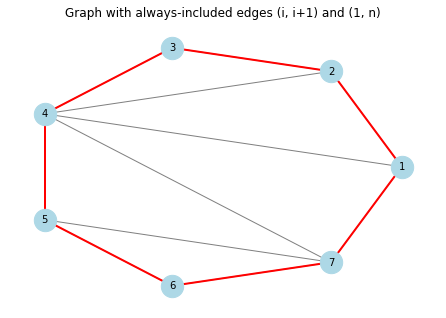

Clique 75


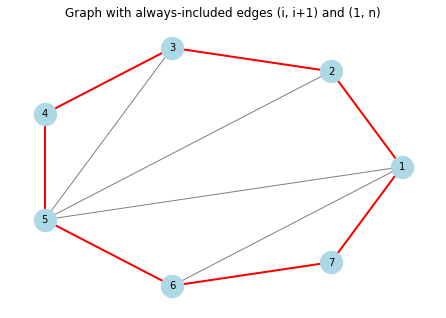

Clique 75


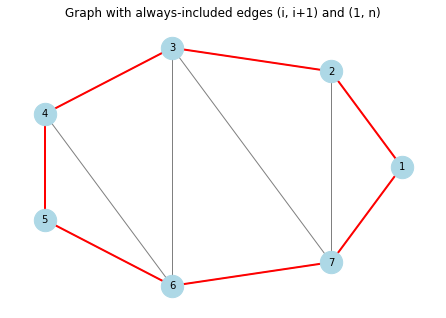

Clique 76


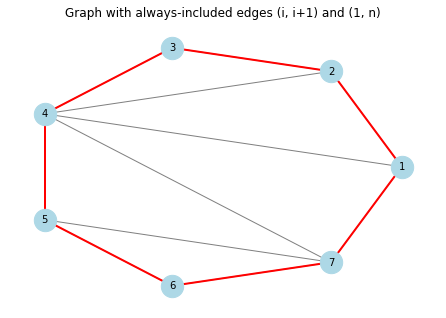

Clique 76


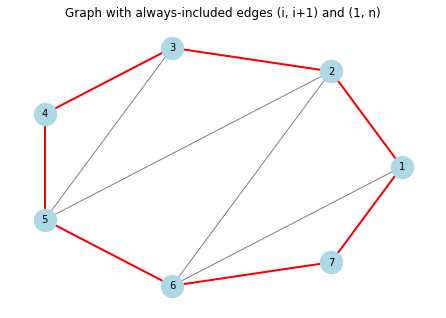

Clique 76


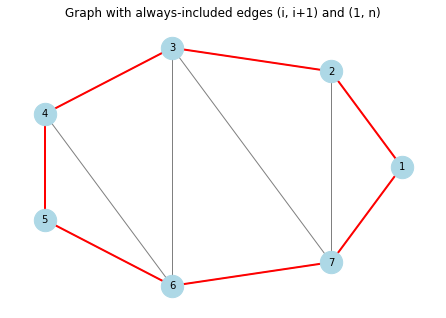

Clique 77


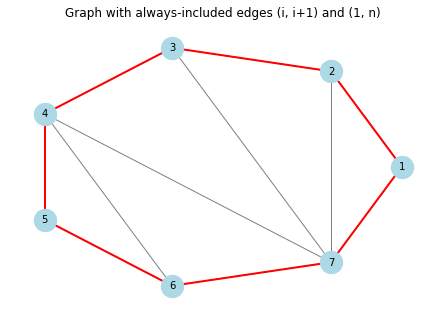

Clique 77


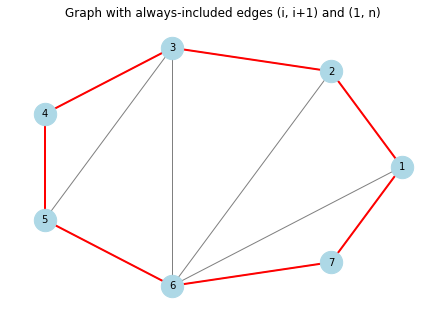

Clique 77


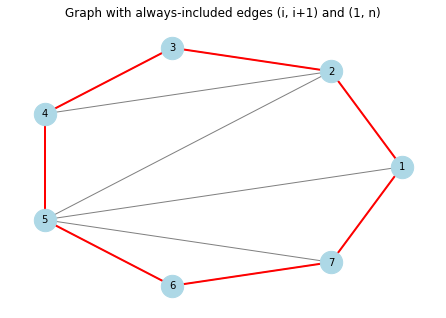

In [8]:
n=7
M = DisjointnessMatrix(n)
triang = triangulations(n)
vertex_cliques = vertex_in_clique_of_size_3(M)
print(len(vertex_cliques))
counter = 0
indices = []
print(vertex_cliques)
for i in range(len(vertex_cliques)) :
    if vertex_cliques[i] :
        counter += 1
    else :
        indices.append(i)
print(counter)
### Write a program which writes down the clique of size 3 that the triangulation is contained in

def cliques_of_size_3(adj_matrix):
    n = len(adj_matrix)
    adj = np.array(adj_matrix)
    cliques = []  # list of cliques (triangles)

    # Find all triangles (i, j, k)
    for i in range(n):
        for j in range(i+1, n):
            if adj[i][j]:
                for k in range(j+1, n):
                    if adj[i][k] and adj[j][k]:
                        cliques.append({i, j, k})

    return cliques

cliques_three = cliques_of_size_3(M)
print(cliques_three)
for i in range(len(cliques_three)) :
    for j in cliques_three[i] :
        print('Clique', i+1)
        visualize_graph(triang[j], n)
